<a href="https://colab.research.google.com/github/ENRICOBIGNOZZI1998/data-analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
#import cufflinks as cf
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
#cf.go_offline()
%matplotlib inline

In [ ]:
symbol='BTC-USD'
df = yf.download(  
        tickers = symbol,
        period = "max",# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max  (optional, default is '1mo')
        interval = "1d",# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo (optional, default is '1d')
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None)
df.columns=["open","high","low","close","volume"]
features=df.columns[0:4]
df=df[features]
df["avg"]=df.mean(axis=1)#open+close+low+high/4
df["med"]=df.open+(df.high-df.low)/2 #centro geometrico dell'escursione
df["medbody"]=df.open+abs(df.open-df.close)/2#centro geometrico escursione candela
df["body"]=df.close-df.open#estensione della candela e colore 
df["range"]=df.high-df.low
df["avg"]=round(df.mean(axis=1),2)#open+close+low+high/4
df["body"]=abs(df.close-df.open)#estensione della candela e colore 
df["range"]=round(df.high-df.low,2)
df=df.apply(lambda x: round(x,2))#prendo solo 2 cifre dopo la virgola
#df.close.iplot(kind='line',theme='white',up_color='green',down_color='red',title='GRAFICO')
plt.show()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#ANALISI DI AUTOCORRELAZIONE

In [ ]:
df_perc=df.copy().pct_change().dropna()*100 #si passa alla percentuale così da poter conrontare titoli di valore diverso
df_perc.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])#da 0 a 50 sono a sinistra rispetto al centro della distr. Questo equivale alla distr. ribasssista
#dal 50 al 100 sono a destra rispetto al centro della distr. questi punti equivalgono ad una tendenza rialzista
#si può pensare di giocare con le code o intorno al centro
#guarda close e i prezzi medi:le chiusure sono confinate fra certe 2 percentuali
#quello che le code della distribuzione sono sbilanciare  a rialzo

,open,high,low,close,avg,med,medbody,body,range
count,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000
mean,0.200034,0.184031,0.201316,0.201203,0.167830,0.210472,0.210628,inf,30.344778
std,3.837379,3.435474,3.815982,3.849700,2.902094,4.067106,4.023251,NaN,126.420703
min,-36.592482,-26.371274,-36.406243,-37.169513,-23.391810,-37.728620,-43.625433,-100.000000,-92.210786
1%,-10.634089,-9.235135,-12.001774,-10.554371,-7.747227,-13.120514,-13.687537,-98.917704,-74.653844
5%,-6.021331,-4.949200,-5.892263,-6.009207,-4.396225,-7.135551,-7.439975,-93.947125,-64.904153
10%,-3.780683,-3.304166,-3.568879,-3.799919,-2.849413,-4.303361,-4.305529,-86.891562,-56.101544
25%,-1.364499,-1.123913,-1.049775,-1.373096,-1.053620,-1.274580,-0.999538,-64.546962,-38.111345
50%,0.167139,-0.050447,0.302677,0.184142,0.069180,0.521997,0.735056,-2.007253,-4.652522
75%,1.786976,1.405056,1.637897,1.788945,1.335897,2.243407,2.233034,181.397220,54.531704


In [ ]:
df_perc.tail(10)#guarda quello che dicevo prima

,open,high,low,close,avg,med,medbody,body,range
Date,,,,,,,,,
2022-10-14,1.177430,2.240336,4.342783,-1.017598,0.772607,0.231599,1.095125,-12.861822,-31.739464
2022-10-15,-1.016844,-3.401905,-0.503050,-0.615199,-1.889831,-2.465022,-1.214673,-40.166599,-75.018740
2022-10-16,-0.607388,0.921586,0.261104,1.051311,0.524611,-0.273933,-0.394090,69.083192,65.911325
2022-10-17,1.046992,1.269753,0.547593,1.467037,1.317592,1.406918,1.258106,41.680892,44.210920
2022-10-18,1.463057,0.158843,-0.148957,-1.106555,0.151701,1.598888,1.281991,-23.440822,12.919757
2022-10-19,-1.101968,-1.619821,-0.089215,-1.007943,-1.318736,-1.848363,-1.148206,-9.516316,-57.732373
2022-10-20,-1.018566,-0.171694,-0.816774,-0.448287,-0.550759,-0.696463,-1.299403,-56.852013,55.728718
2022-10-21,-0.443566,-0.402895,-1.056798,0.623132,-0.052252,-0.121958,-0.351507,41.398933,35.686856
2022-10-22,0.625512,0.055569,1.924621,0.186309,0.183046,-0.290982,0.405225,-69.975685,-75.167771


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



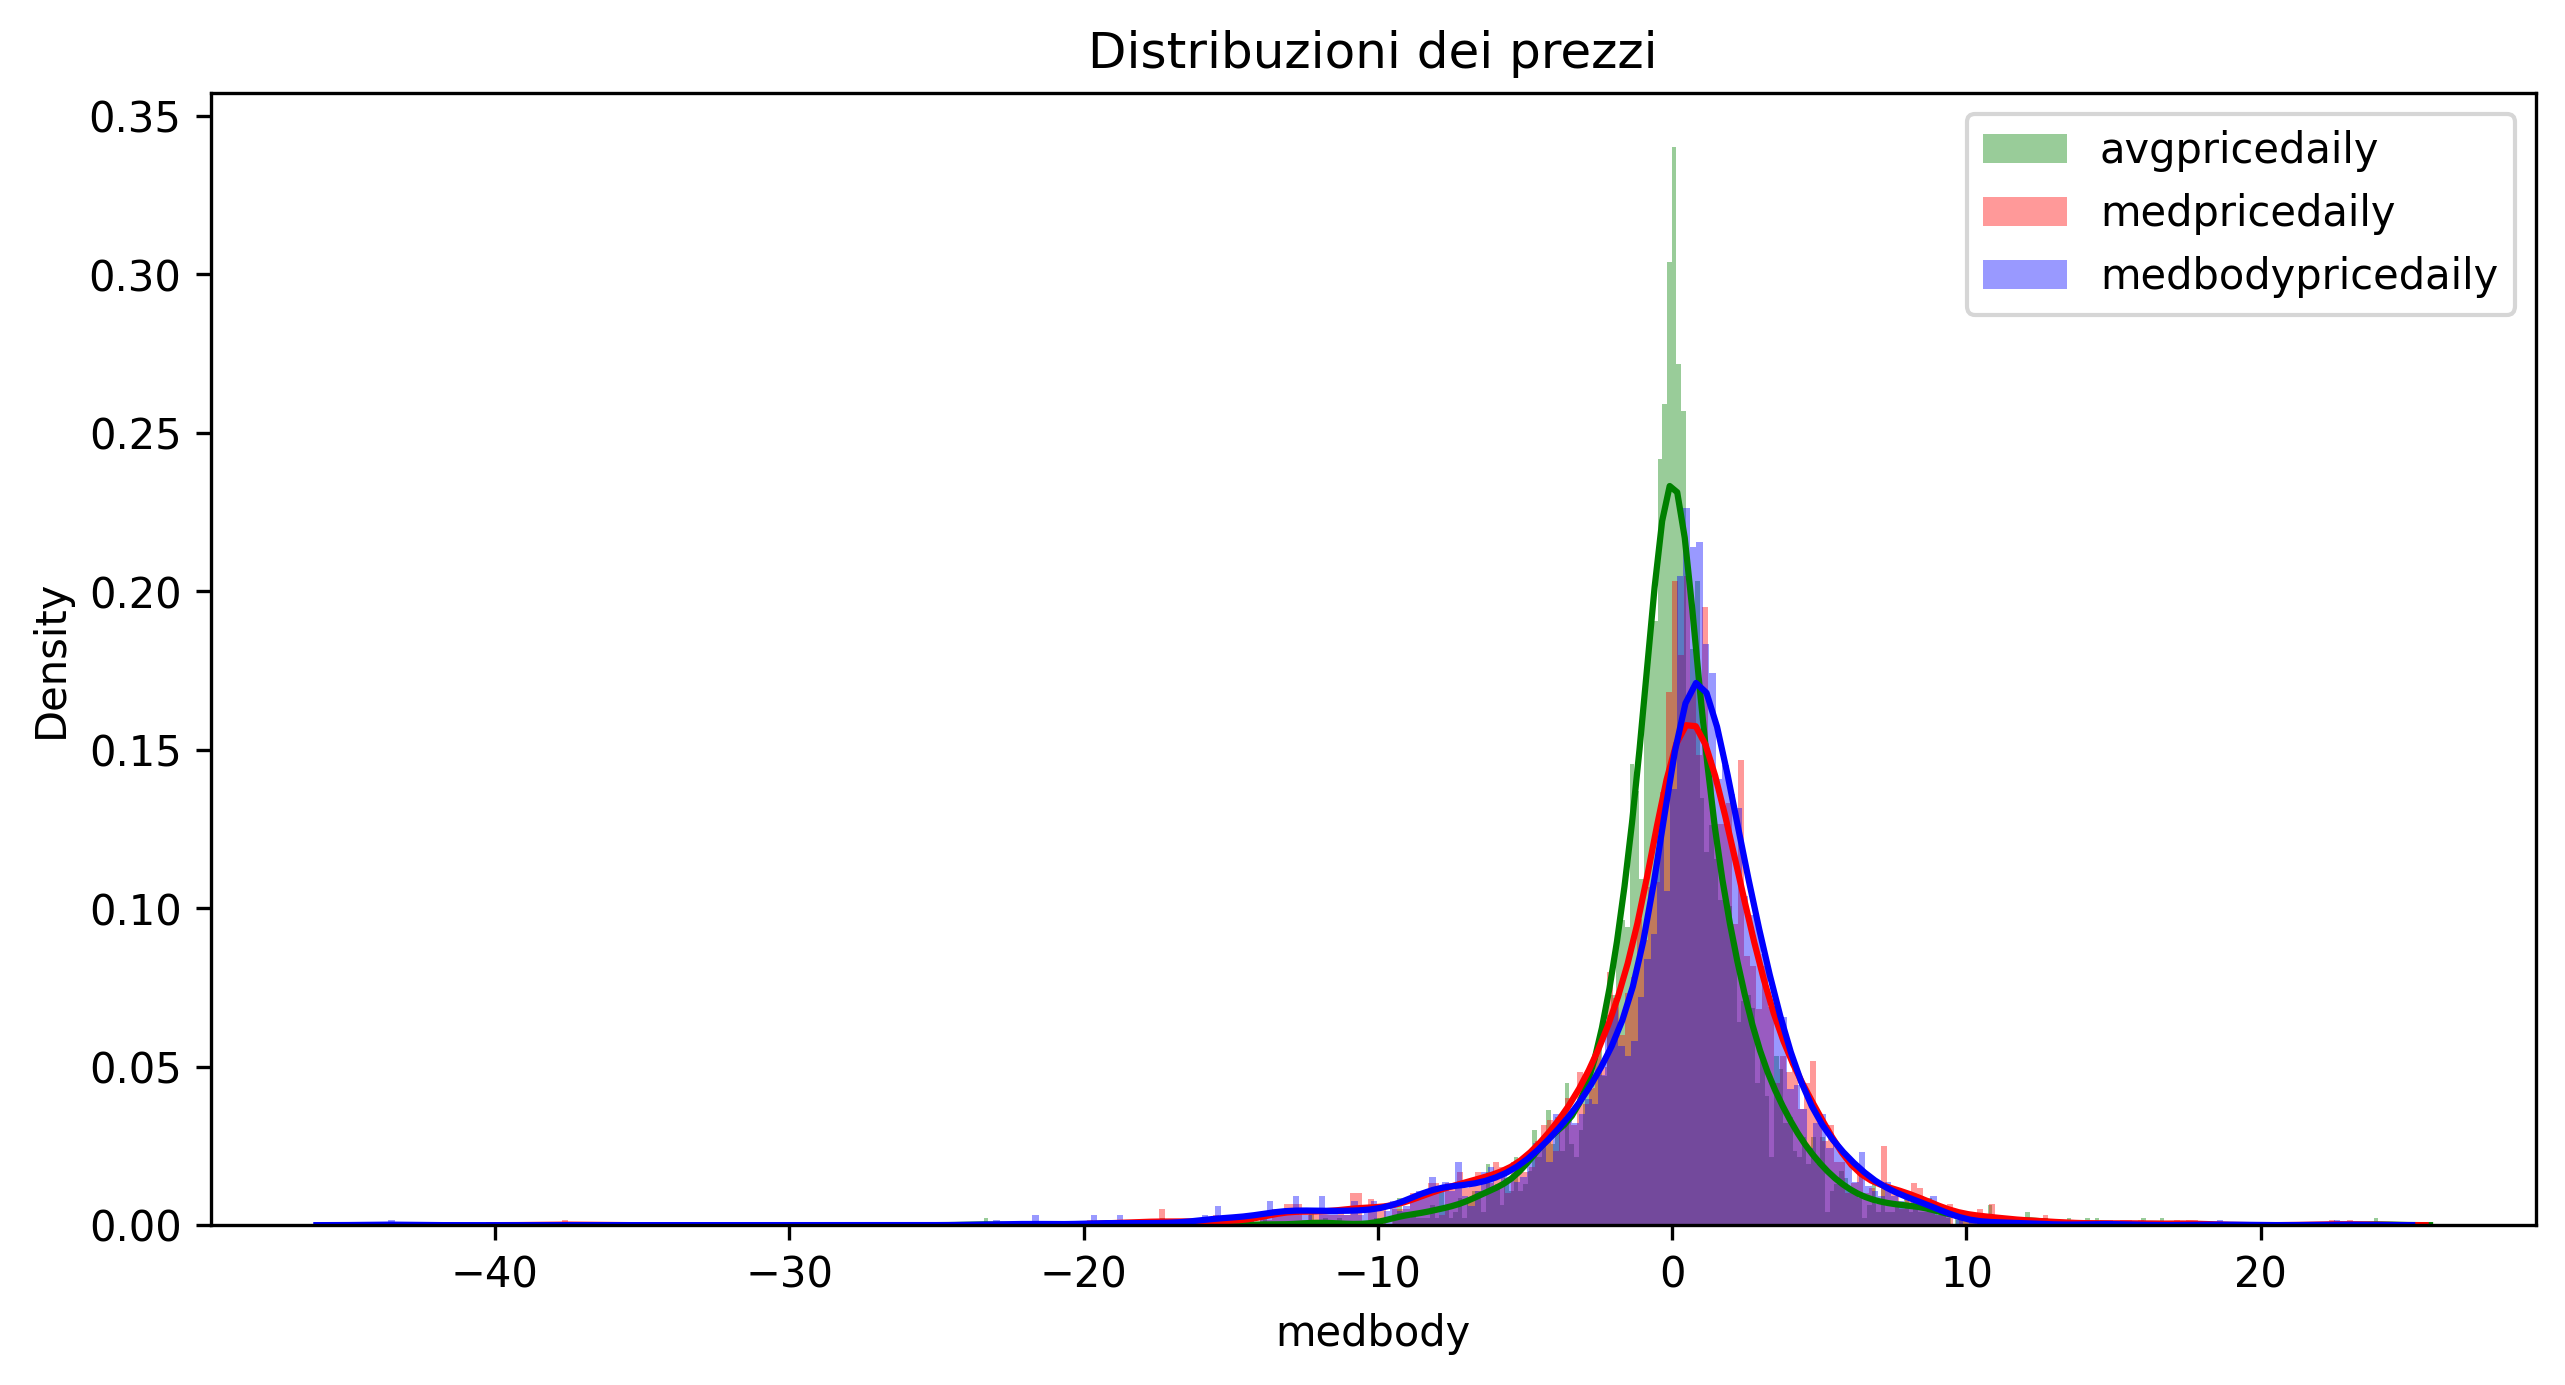

In [ ]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(df_perc.avg,bins=300,color="green", label="avgpricedaily")
sns.distplot(df_perc.med,bins=300,color="red", label="medpricedaily")
sns.distplot(df_perc.medbody,bins=300,color="blue", label="medbodypricedaily")
plt.title('Distribuzioni dei prezzi')
plt.legend()
plt.show()

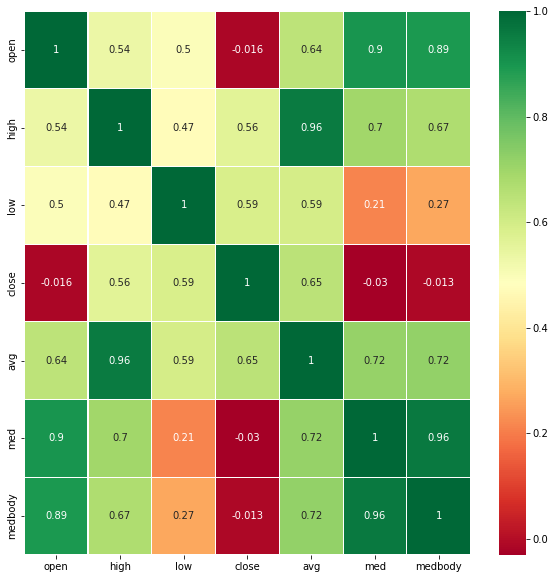

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_perc.iloc[:,:-2].corr(),cmap="RdYlGn",linecolor="white",linewidth=0.1,annot=True)
plt.show()
#correlazioen fra i diversi dati

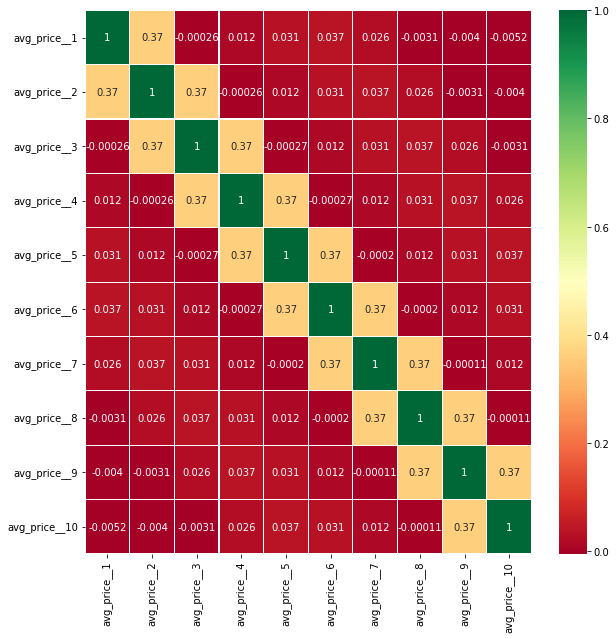

probabilità che il prossimo average price sia superiore al precendente  65.12987012987013 %


In [ ]:
df_perc=df.copy().pct_change().dropna()*100 #si passa alla percentuale così da poter conrontare titoli di valore diverso
avg=df_perc.copy()
n_corr=10
for i in range (1, n_corr+1):#vedo la correlazione fra l'escursione percentuale al tempo t1 e t0 così da capire il trend
  nome_colonna="avg_price__"+str(i)
  avg[nome_colonna]=avg.avg.shift(i)
col=avg.columns
avg[col[9:]]#essendo un valore mediato è più immune al rumore
plt.figure(figsize=(10,10))
sns.heatmap(avg[col[9:]].corr(),cmap="RdYlGn",linecolor="white",linewidth=0.1,annot=True)
plt.show()
#questo mi permette chiaramente di capire se sono in tendenza rialzista o ribbassista e sulla stabilità di questa tendenza
#considero una variazione percentuale positiva fra le gli avarage price
treshold_low=0
treshold_high=0
df_perc["control"]=np.where((df_perc.avg.shift(1)>=treshold_low) & (df_perc.avg>=treshold_high),1,0)
verificati=df_perc.control.sum()
total=df_perc[(df_perc.avg>=treshold_low)].avg.count()
perc=verificati/total*100
print("probabilità che il prossimo average price sia superiore al precendente ",perc,"%")
#probabilità che il prossimo avg price sia superiore al precedente
#ilproblema di questa strategia è che per avere un vantaggio bisogna comprare esattamente allo steso prezzo dell'ultimo avg price

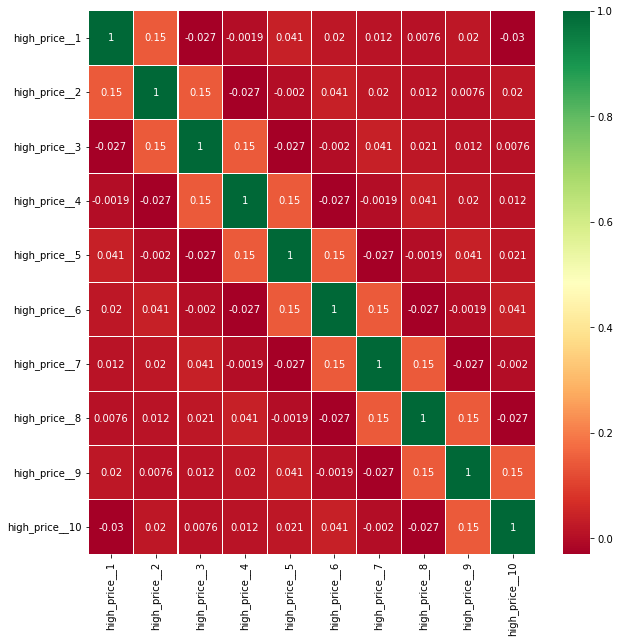

probabilità che a seguito di un massimo ce ne sia un successico 53.94828791055206 %


In [ ]:
#per ovviare il problema si fa l'analisi con i massimi
perc=df_perc.copy()
n_corr=10
for i in range (1, n_corr+1):#vedo la correlazione fra l'escursione percentuale al tempo t1 e t0 così da capire il trend
  nome_colonna="high_price__"+str(i)
  perc[nome_colonna]=perc.high.shift(i)
col=perc.columns
#print(col)
perc[col[10:]]#essendo un valore mediato è più immune al rumore
plt.figure(figsize=(10,10))
sns.heatmap(perc[col[10:]].corr(),cmap="RdYlGn",linecolor="white",linewidth=0.1,annot=True)
plt.show()
#considero una variazione percentuale positiva fra le gli avarage price
treshold_low=0#almeno soglia di 0% fra i massimi
treshold_high=0
perc["controlo"]=np.where((perc.high.shift(1)>=treshold_low) & (perc.high>=treshold_high),1,0)
verificati=perc.controlo.sum()
total=perc[(perc.high>=treshold_low)].high.count()
perco=verificati/total*100
print("probabilità che a seguito di un massimo ce ne sia un successico",perco,"%")
#probabilità che a seguito di un rialzo dei massimi ce ne sia uno successivo

In [ ]:
#POSIZIONAMENTO DELLO STOP LOSS

In [ ]:
df["CO"]=round(df.close-df.open,2)
df["OL"]=round(df.open-df.low,2)
df["HO"]=round(df.high-df.open,2)
df["CL"]=round(df.close-df.low,2)
df["HC"]=round(df.high-df.close,2)
df["Closeperc"]=round(df.body/df.range*100,2)
df["Color"]=list(map(lambda x:"black" if x<= 0 else "white",df.CO))

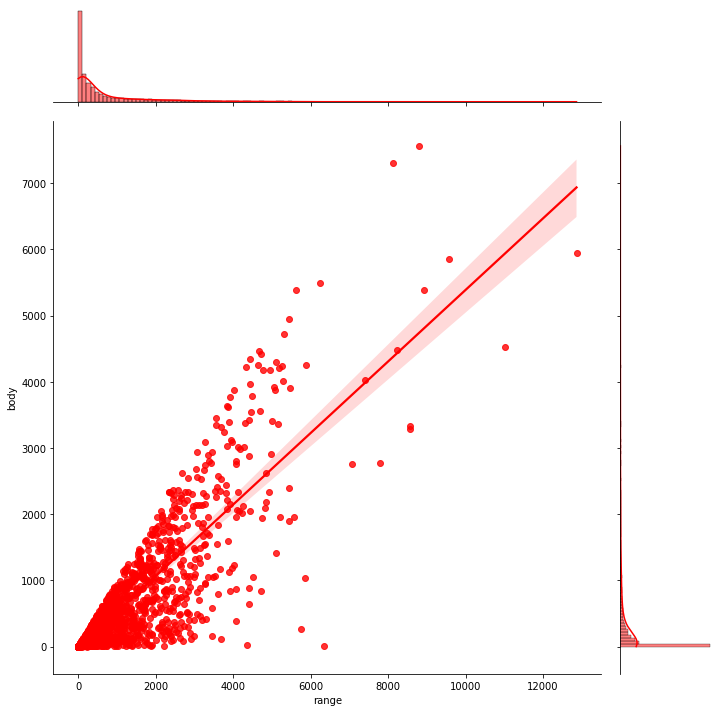

In [ ]:
sns.jointplot(x='range',y='body', height=10,data=df, color='r', kind='reg')
#più aumenta il range(cioè la volatilità), più aumenta il corpo della candela, cioè la differenza fra apertura e chiusura

positive: count    1579.000000
mean      157.651811
std       350.396190
min         0.000000
25%         1.575000
50%        23.070000
75%       131.125000
80%       200.456000
90%       433.520000
95%       858.447000
99%      1866.212400
max      3091.670000
Name: OL, dtype: float64
STOP LOSS LONG TARATO SUL 95 ESIMO PERCENTILE -858.45
STOP LOSS LONG TARATO SUL 99 ESIMO PERCENTILE -1866.21


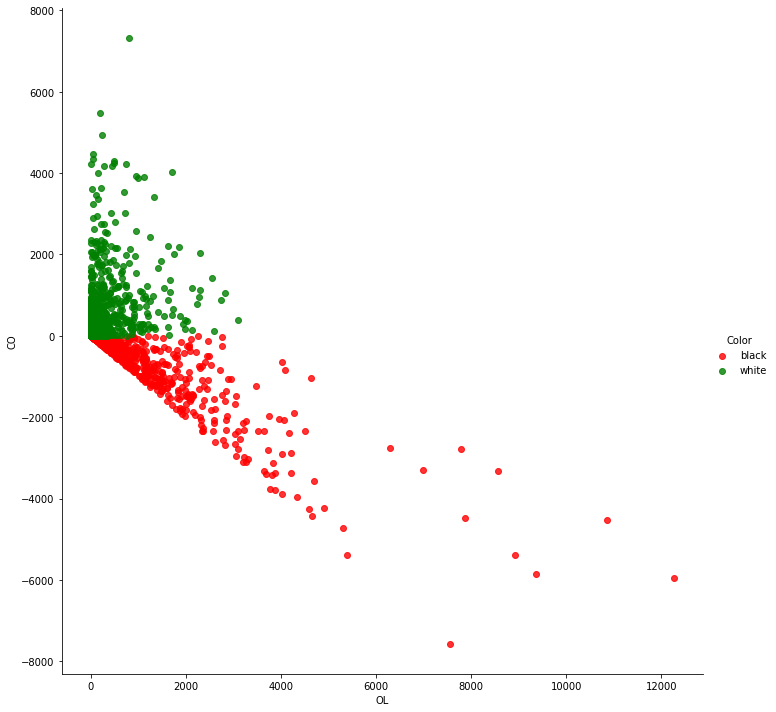

In [ ]:
sns.lmplot(x='OL',y='CO', height=10,hue="Color",data=df, fit_reg=False, palette=dict(white = "green",black="red"))#DOPO 2 EURO NON TROVO PIù MOLTI EVENTI VERDI QUINDI CONVIENE FARE BORSA IN GIORNATE CON OL<2
print("positive:",df[df["CO"]>0]["OL"].describe([.25,.5,.75,.8,.9,.95,.99]))
print("STOP LOSS LONG TARATO SUL 95 ESIMO PERCENTILE",round(-df[df["CO"]>0]["OL"].quantile(.95),2))#primo stop loss rispetto a open
print("STOP LOSS LONG TARATO SUL 99 ESIMO PERCENTILE",round(-df[df["CO"]>0]["OL"].quantile(.99),2))#secondo stop loss rispetto a open

positive: count    1579.000000
mean      157.651811
std       350.396190
min         0.000000
25%         1.575000
50%        23.070000
75%       131.125000
80%       200.456000
90%       433.520000
95%       858.447000
99%      1866.212400
max      3091.670000
Name: OL, dtype: float64
STOP LOSS SHORT TARATO SUL 95 ESIMO PERCENTILE -874.02
STOP LOSS SHORT TARATO SUL 99 ESIMO PERCENTILE -1579.66


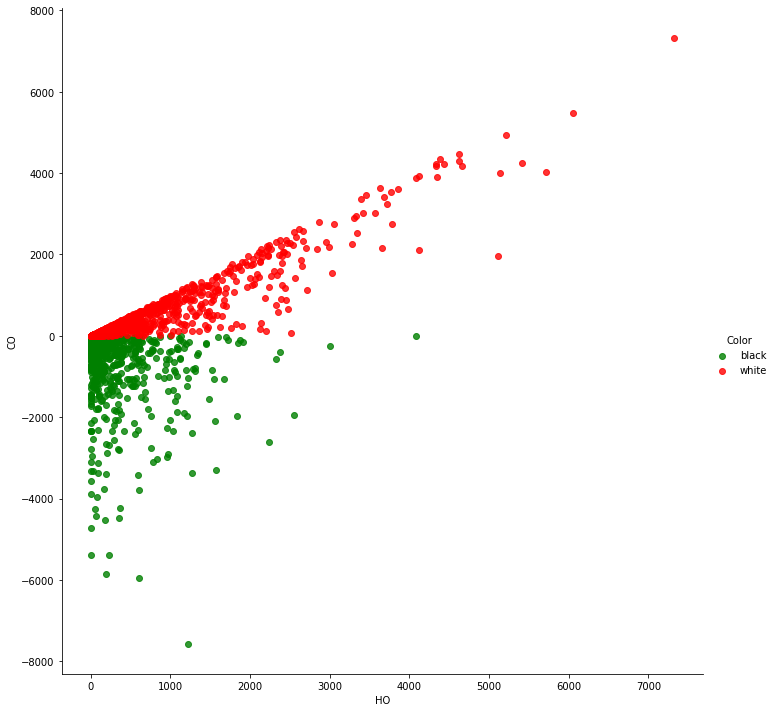

In [ ]:
sns.lmplot(x='HO',y='CO', height=10,hue="Color",data=df, fit_reg=False, palette=dict(white = "red",black="green"))#DOPO 2 EURO NON TROVO PIù MOLTI EVENTI VERDI QUINDI CONVIENE FARE BORSA IN GIORNATE CON OL<2
print("positive:",df[df["CO"]>0]["OL"].describe([.25,.5,.75,.8,.9,.95,.99]))
print("STOP LOSS SHORT TARATO SUL 95 ESIMO PERCENTILE",round(-df[df["CO"]<0]["HO"].quantile(.95),2))#primo stop loss rispetto a open
print("STOP LOSS SHORT TARATO SUL 99 ESIMO PERCENTILE",round(-df[df["CO"]<0]["HO"].quantile(.99),2))#secondo stop loss rispetto a open

In [ ]:
#ANALISI DEI GAP

In [ ]:
df["CO"]=round(df.close-df.open,2)
df["COperc"]=round(df.close-df.open/df.open*100,2)
df["delta"]=df.open-df.close.shift(1)
df["Color"]=list(map(lambda x:"black" if x<= 0 else "white",df.CO))
df["GAPUP"]=np.where((df.open-df.high.shift(1))>0,(df.open-df.high.shift(1)),np.nan)
df["GAPDOWN"]=np.where((df.open-df.low.shift(1))<0,(df.open-df.low.shift(1)),np.nan)
df["LAPUP"]=np.where((df.open>df.close.shift(1))&(df.open<=df.high.shift(1)),(df.open-df.close.shift(1)),np.nan)
df["LAPDOWN"]=np.where((df.open<df.close.shift(1))&(df.open>=df.low.shift(1)),(df.open-df.close.shift(1)),np.nan)

num_up=df.GAPUP.count()
perc_up=round(num_up/df.open.count()*100,2)
up_money=round(df.GAPUP.sum(),2)
media_up_money=round(df.GAPUP.mean(),2)

df['GAPUPREF']=np.where((df.GAPUP>0)&(df.low<df.high.shift(1)),df.GAPUP,np.nan)#GAPRICOLMATI
num_upref=df.GAPUPREF.count()
perc_upref=round(num_upref/num_up*100,2)
up_money_ref=round(df.GAPUPREF.sum(),2)
media_upref_money=round(df.GAPUPREF.mean(),2)

df['GAPUPPOS']=np.where((df.GAPUP>0)&(df.close>df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_uppos=df.GAPUPPOS.count()
perc_uppos=round(num_uppos/num_up*100,2)
up_money_uppos=round(df.GAPUPPOS.sum(),2)
media_uppos_money=round(df.GAPUPREF.mean(),2)

df['GAPUPNEG']=np.where((df.GAPUP>0)&(df.close<df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_upneg=df.GAPUPNEG.count()
perc_upneg=round(num_uppos/num_up*100,2)
up_money_upneg=round(df.GAPUPNEG.sum(),2)
media_upneg_money=round(df.GAPUPNEG.mean(),2)

print("numero di gap positivi",num_up)
print("percentuale di gap positivi su numero di giorni totali:",perc_up)
print("soldi totali 'saltati' nei gap",up_money)
print("salto medio:",media_up_money)
print("")
print("numero di gap up ricolmati:",num_upref)#meno di un gup up su 2 viene ricolmato
print("percentuale di gap up ricolmatio su numero di gap up",perc_upref)
print("soldi totali 'saltati' nei gap up ricolmati:",up_money_ref)
print("soldi medi per salto gap up ricolmato",media_upref_money)
print("")
print("numero gap up dove in seguito al gap la giornata chiude positivamente:",num_uppos)#meno di un gup up su 2 viene ricolmato
print("percentuale gap up dove in seguito al gap la giornata chiude positivamente(su gap up):",perc_uppos)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei gap up 'positivi':",up_money_uppos)
print("soldi medi per salto gap up positivi",media_uppos_money)
print("")
print("numero gap up dove in seguito al gap la giornata chiude negativamente:",num_upneg)#meno di un gup up su 2 viene ricolmato
print("percentuale gap up dove in seguito al gap la giornata chiude negativamente(su gap up):",perc_upneg)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei gap up 'negativi':",up_money_upneg)
print("soldi medi per salto gap up negativi",media_upneg_money)

numero di gap positivi 81
percentuale di gap positivi su numero di giorni totali: 2.74
soldi totali 'saltati' nei gap 1218.7
salto medio: 15.05

numero di gap up ricolmati: 65
percentuale di gap up ricolmatio su numero di gap up 80.25
soldi totali 'saltati' nei gap up ricolmati: 980.85
soldi medi per salto gap up ricolmato 15.09

numero gap up dove in seguito al gap la giornata chiude positivamente: 48
percentuale gap up dove in seguito al gap la giornata chiude positivamente(su gap up): 59.26
soldi totali 'saltati' nei gap up 'positivi': 12336.07
soldi medi per salto gap up positivi 15.09

numero gap up dove in seguito al gap la giornata chiude negativamente: 33
percentuale gap up dove in seguito al gap la giornata chiude negativamente(su gap up): 59.26
soldi totali 'saltati' nei gap up 'negativi': -5081.59
soldi medi per salto gap up negativi -153.99


In [ ]:
num_down=df.GAPDOWN.count()
perc_down=round(num_down/df.open.count()*100,2)
down_money=round(df.GAPDOWN.sum(),2)
media_down_money=round(df.GAPDOWN.mean(),2)

df['GAPDOWNREF']=np.where((df.GAPDOWN<0)&(df.low.shift(1)<df.high),df.GAPDOWN,np.nan)#GAPRICOLMATI
num_downref=df.GAPDOWNREF.count()
perc_downref=round(num_downref/num_down*100,2)
down_money_ref=round(df.GAPDOWNREF.sum(),2)
media_downref_money=round(df.GAPDOWNREF.mean(),2)

df['GAPDOWNPOS']=np.where((df.GAPDOWN<0)&(df.close>df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_downpos=df.GAPDOWNPOS.count()
perc_downpos=round(num_downpos/num_down*100,2)
up_money_downpos=round(df.GAPDOWNPOS.sum(),2)
media_downpos_money=round(df.GAPDOWNPOS.mean(),2)

df['GAPDOWNNEG']=np.where((df.GAPDOWN<0)&(df.close<df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_downneg=df.GAPDOWNNEG.count()
perc_downneg=round(num_downneg/num_down*100,2)
up_money_downneg=round(df.GAPDOWNNEG.sum(),2)
media_downneg_money=round(df.GAPDOWNNEG.mean(),2)
                        
print("numero di gap negativi",num_down)
print("percentuale di gap negativi su numero di giorni totali:",perc_down)
print("soldi totali 'saltati' nei gap",down_money)
print("salto medio:",media_down_money)
print("")
print("numero di gap down ricolmati:",num_downref)#meno di un gup up su 2 viene ricolmato
print("percentuale di gap down ricolmati su numero di gap down",perc_downref)
print("soldi totali 'saltati' nei gap down ricolmati:",down_money_ref)
print("soldi medi per salto gap down ricolmato",media_downref_money)
print("")
print("numero gap down dove in seguito al gap la giornata chiude positivamente:",num_downpos)#meno di un gup up su 2 viene ricolmato
print("percentuale gap down dove in seguito al gap la giornata chiude positivamente(su gap down):",perc_downpos)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei gap down 'positivi':",up_money_downpos)
print("soldi medi per salto gap down positivi",media_downpos_money)
print("")
print("numero gap up dove in seguito al gap la giornata chiude negativamente:",num_upneg)#meno di un gup up su 2 viene ricolmato
print("percentuale gap up dove in seguito al gap la giornata chiude negativamente(su gap up):",perc_upneg)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei gap up 'negativi':",up_money_upneg)
print("soldi medi per salto gap up negativi",media_upneg_money)

numero di gap negativi 38
percentuale di gap negativi su numero di giorni totali: 1.28
soldi totali 'saltati' nei gap -345.38
salto medio: -9.09

numero di gap down ricolmati: 30
percentuale di gap down ricolmati su numero di gap down 78.95
soldi totali 'saltati' nei gap down ricolmati: -259.02
soldi medi per salto gap down ricolmato -8.63

numero gap down dove in seguito al gap la giornata chiude positivamente: 18
percentuale gap down dove in seguito al gap la giornata chiude positivamente(su gap down): 47.37
soldi totali 'saltati' nei gap down 'positivi': 3486.92
soldi medi per salto gap down positivi 193.72

numero gap up dove in seguito al gap la giornata chiude negativamente: 33
percentuale gap up dove in seguito al gap la giornata chiude negativamente(su gap up): 59.26
soldi totali 'saltati' nei gap up 'negativi': -5081.59
soldi medi per salto gap up negativi -153.99


emerge la tendenza all'auemnto delle prestazioni all'aumentare del gap up sia in positivo sia in negativo


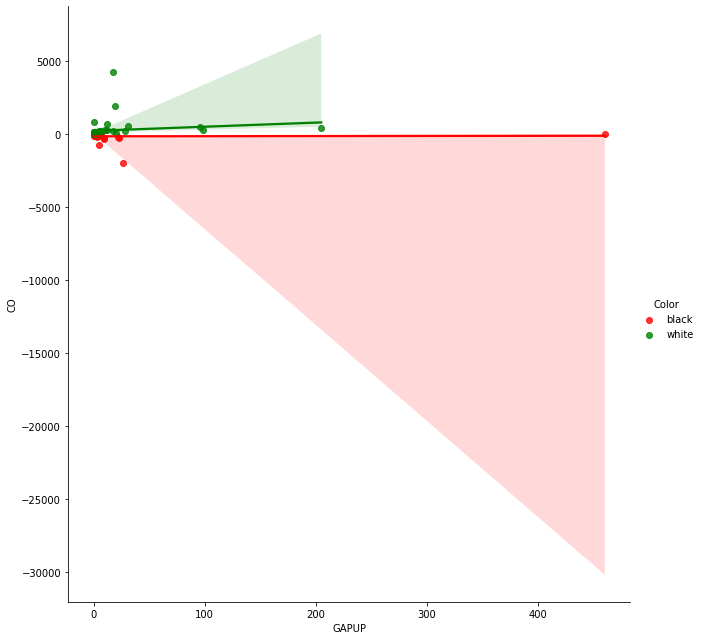

In [ ]:
sns.lmplot(x='GAPUP',y='CO', height=9,hue="Color",data=df, fit_reg=True, palette=dict(white = "green",black="red"))
#emrge la tendenza all'auemnto delle prestazioni all'aumentare del gap
print("emerge la tendenza all'auemnto delle prestazioni all'aumentare del gap up sia in positivo sia in negativo")

emerge la tendenza all'auemnto delle prestazioni all'aumentare del gap down


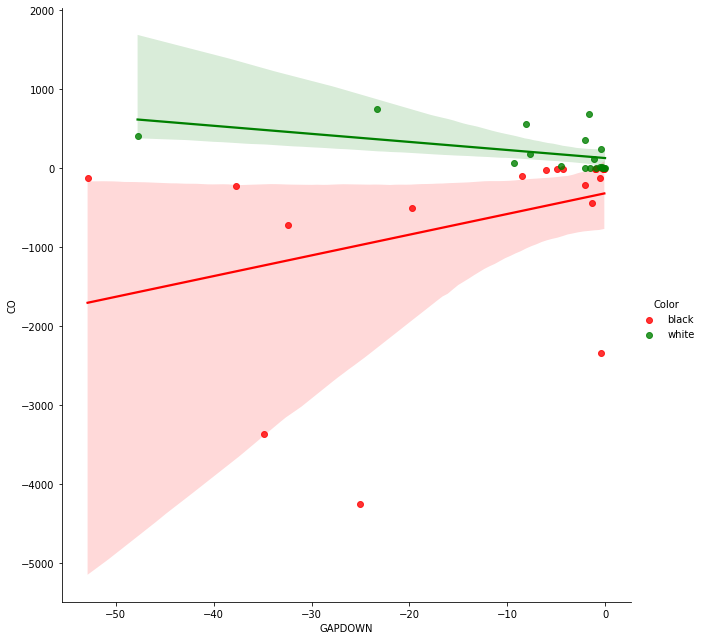

In [ ]:
sns.lmplot(x='GAPDOWN',y='CO', height=9,hue="Color",data=df, fit_reg=True, palette=dict(white = "green",black="red"))
print("emerge la tendenza all'auemnto delle prestazioni all'aumentare del gap down")

emerge la tendenza a violare anche la close in un gap up ricolmato


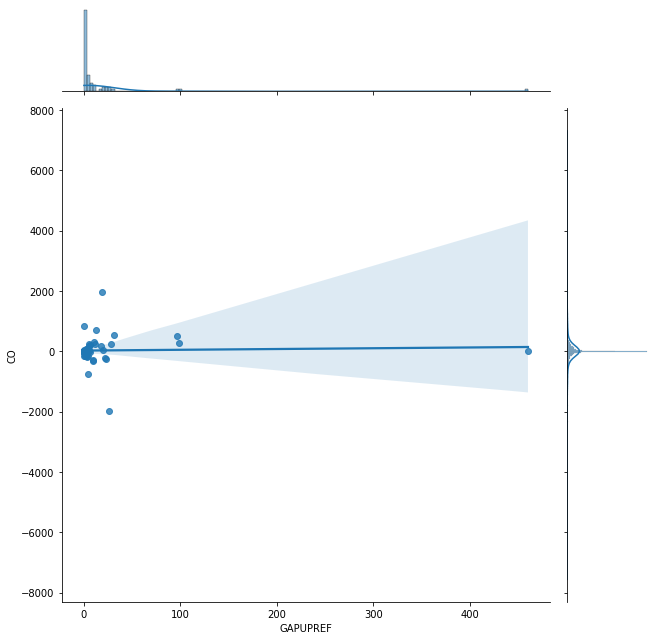

In [ ]:
sns.jointplot(x='GAPUPREF',y='CO', height=9,data=df, kind='reg')
print("emerge la tendenza a violare anche la close in un gap up ricolmato")

emerge la leggera tendenza a violare anche la close in un gap down ricolmato (quindi i prezzi aumentano)


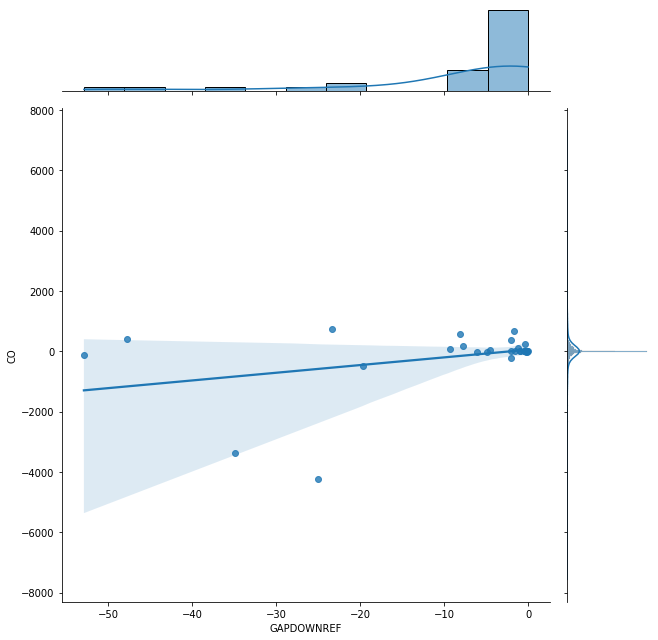

In [ ]:
sns.jointplot(x='GAPDOWNREF',y='CO', height=9,data=df, kind='reg')
print("emerge la leggera tendenza a violare anche la close in un gap down ricolmato (quindi i prezzi aumentano)")

In [ ]:
#analisi dei lap

In [ ]:
num_up=df.LAPUP.count()
perc_up=round(num_up/df.open.count()*100,2)
up_money=round(df.LAPUP.sum(),2)
media_up_money=round(df.GAPUP.mean(),2)

df['LAPUPREF']=np.where((df.LAPUP>0)&(df.low<df.high.shift(1)),df.LAPUP,np.nan)#GAPRICOLMATI
num_upref=df.LAPUPREF.count()
perc_upref=round(num_upref/num_up*100,2)
up_money_ref=round(df.LAPUPREF.sum(),2)
media_upref_money=round(df.LAPUPREF.mean(),2)

df['LAPUPPOS']=np.where((df.LAPUP>0)&(df.close>df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_uppos=df.LAPUPPOS.count()
perc_uppos=round(num_uppos/num_up*100,2)
up_money_uppos=round(df.LAPUPPOS.sum(),2)
media_uppos_money=round(df.LAPUPREF.mean(),2)

df['LAPUPNEG']=np.where((df.LAPUP>0)&(df.close<df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_upneg=df.GAPUPNEG.count()
perc_upneg=round(num_uppos/num_up*100,2)
up_money_upneg=round(df.GAPUPNEG.sum(),2)
media_upneg_money=round(df.GAPUPNEG.mean(),2)

print("numero di lap positivi",num_up)
print("percentuale di lap positivi su numero di giorni totali:",perc_up)
print("soldi totali 'saltati' nei lap",up_money)
print("salto medio:",media_up_money)
print("")
print("numero di lap up ricolmati:",num_upref)#meno di un gup up su 2 viene ricolmato
print("percentuale di lap up ricolmatio su numero di gap up",perc_upref)
print("soldi totali 'saltati' nei lap up ricolmati:",up_money_ref)
print("soldi medi per salto lap up ricolmato",media_upref_money)
print("")
print("numero lap up dove in seguito al lap la giornata chiude positivamente:",num_uppos)#meno di un gup up su 2 viene ricolmato
print("percentuale lap up dove in seguito al lap la giornata chiude positivamente(su lap up):",perc_uppos)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei gap up 'positivi':",up_money_uppos)
print("soldi medi per salto gap up positivi",media_uppos_money)
print("")
print("numero lap up dove in seguito al lap la giornata chiude negativamente:",num_upneg)#meno di un gup up su 2 viene ricolmato
print("percentuale lap up dove in seguito al lap la giornata chiude negativamente(su lap up):",perc_upneg)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei lap up 'negativi':",up_money_upneg)
print("soldi medi per salto lap up negativi",media_upneg_money)


numero di lap positivi 1388
percentuale di lap positivi su numero di giorni totali: 46.91
soldi totali 'saltati' nei lap 13796.15
salto medio: 15.05

numero di lap up ricolmati: 1388
percentuale di lap up ricolmatio su numero di gap up 100.0
soldi totali 'saltati' nei lap up ricolmati: 13796.15
soldi medi per salto lap up ricolmato 9.94

numero lap up dove in seguito al lap la giornata chiude positivamente: 751
percentuale lap up dove in seguito al lap la giornata chiude positivamente(su lap up): 54.11
soldi totali 'saltati' nei gap up 'positivi': 241141.64
soldi medi per salto gap up positivi 9.94

numero lap up dove in seguito al lap la giornata chiude negativamente: 33
percentuale lap up dove in seguito al lap la giornata chiude negativamente(su lap up): 54.11
soldi totali 'saltati' nei lap up 'negativi': -5081.59
soldi medi per salto lap up negativi -153.99


In [ ]:
num_down=df.LAPDOWN.count()
perc_down=round(num_down/df.open.count()*100,2)
down_money=round(df.LAPDOWN.sum(),2)
media_down_money=round(df.LAPDOWN.mean(),2)

df['LAPDOWNREF']=np.where((df.LAPDOWN<0)&(df.low.shift(1)<df.high),df.LAPDOWN,np.nan)#GAPRICOLMATI
num_downref=df.LAPDOWNREF.count()
perc_downref=round(num_downref/num_down*100,2)
down_money_ref=round(df.GAPDOWNREF.sum(),2)
media_downref_money=round(df.GAPDOWNREF.mean(),2)

df['LAPDOWNPOS']=np.where((df.LAPDOWN<0)&(df.close>df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_downpos=df.LAPDOWNPOS.count()
perc_downpos=round(num_downpos/num_down*100,2)
up_money_downpos=round(df.LAPDOWNPOS.sum(),2)
media_downpos_money=round(df.LAPDOWNPOS.mean(),2)

df['LAPDOWNNEG']=np.where((df.LAPDOWN<0)&(df.close<df.open),df.close-df.open,np.nan)#GAP chiusi positivamente
num_downneg=df.LAPDOWNNEG.count()
perc_downneg=round(num_downneg/num_down*100,2)
up_money_downneg=round(df.LAPDOWNNEG.sum(),2)
media_downneg_money=round(df.LAPDOWNNEG.mean(),2)
                        
print("numero di lap negativi",num_down)
print("percentuale di lap negativi su numero di giorni totali:",perc_down)
print("soldi totali 'saltati' nei lap",down_money)
print("salto medio:",media_down_money)
print("")
print("numero di lap down ricolmati:",num_downref)#meno di un gup up su 2 viene ricolmato
print("percentuale di lap down ricolmatio su numero di lap down",perc_downref)
print("soldi totali 'saltati' nei lap down ricolmati:",down_money_ref)
print("soldi medi per salto lap down ricolmato",media_downref_money)
print("")
print("numero lap down dove in seguito al gap la giornata chiude positivamente:",num_downpos)#meno di un gup up su 2 viene ricolmato
print("percentuale lap down dove in seguito al lap la giornata chiude positivamente(su lap down):",perc_downpos)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei lap down 'positivi':",up_money_downpos)
print("soldi medi per salto lap down positivi",media_downpos_money)
print("")
print("numero lap up dove in seguito al lap la giornata chiude negativamente:",num_upneg)#meno di un gup up su 2 viene ricolmato
print("percentuale lap up dove in seguito al lap la giornata chiude negativamente(su lap up):",perc_upneg)#il 64% dei gap up si chiude positivamente
print("soldi totali 'saltati' nei lap up 'negativi':",up_money_upneg)
print("soldi medi per salto lap up negativi",media_upneg_money)

numero di lap negativi 1415
percentuale di lap negativi su numero di giorni totali: 47.82
soldi totali 'saltati' nei lap -10477.63
salto medio: -7.4

numero di lap down ricolmati: 1415
percentuale di lap down ricolmatio su numero di lap down 100.0
soldi totali 'saltati' nei lap down ricolmati: -259.02
soldi medi per salto lap down ricolmato -8.63

numero lap down dove in seguito al gap la giornata chiude positivamente: 741
percentuale lap down dove in seguito al lap la giornata chiude positivamente(su lap down): 52.37
soldi totali 'saltati' nei lap down 'positivi': 274965.14
soldi medi per salto lap down positivi 371.07

numero lap up dove in seguito al lap la giornata chiude negativamente: 33
percentuale lap up dove in seguito al lap la giornata chiude negativamente(su lap up): 54.11
soldi totali 'saltati' nei lap up 'negativi': -5081.59
soldi medi per salto lap up negativi -153.99


emerge la tendenza all'aumento delle prestazioni all'aumentare del gap up sia in positivo ma soprattutto in negativo


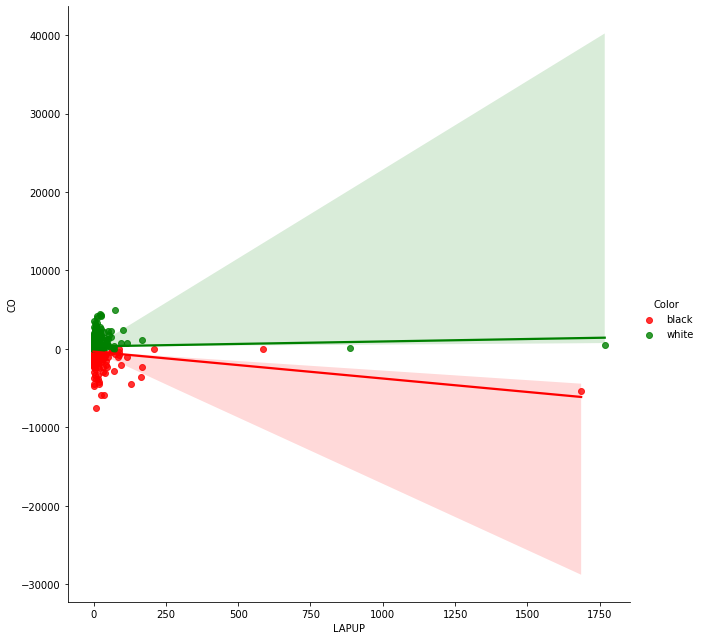

In [ ]:
sns.lmplot(x='LAPUP',y='CO', height=9,hue="Color",data=df, fit_reg=True, palette=dict(white = "green",black="red"))
#emrge la tendenza all'auemnto delle prestazioni all'aumentare del gap
print("emerge la tendenza all'aumento delle prestazioni all'aumentare del gap up sia in positivo ma soprattutto in negativo")

emerge la tendenza all'aumento delle prestazioni all'aumentare del gap down soprattutto in negativo


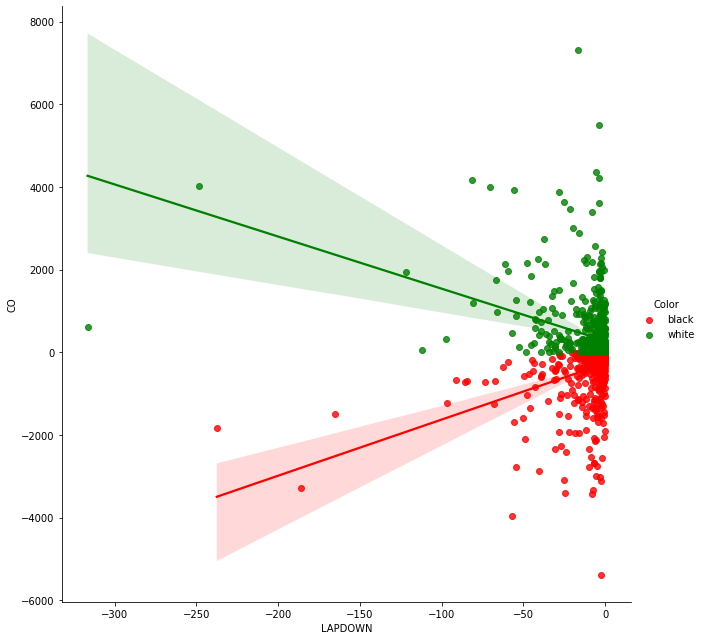

In [ ]:
sns.lmplot(x='LAPDOWN',y='CO', height=9,hue="Color",data=df, fit_reg=True, palette=dict(white = "green",black="red"))
print("emerge la tendenza all'aumento delle prestazioni all'aumentare del gap down soprattutto in negativo")

emerge la tendenza del prezzo a mantenersi costante


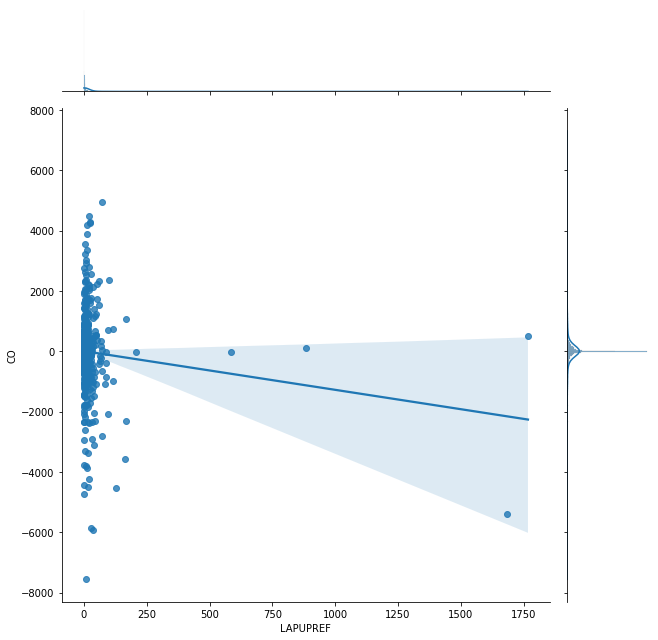

In [ ]:
sns.jointplot(x='LAPUPREF',y='CO', height=9,data=df, kind='reg')
print("emerge la tendenza del prezzo a mantenersi costante")

emerge la tendenza a violare anche la close in un gap down ricolmato (quindi i prezzi aumentano)


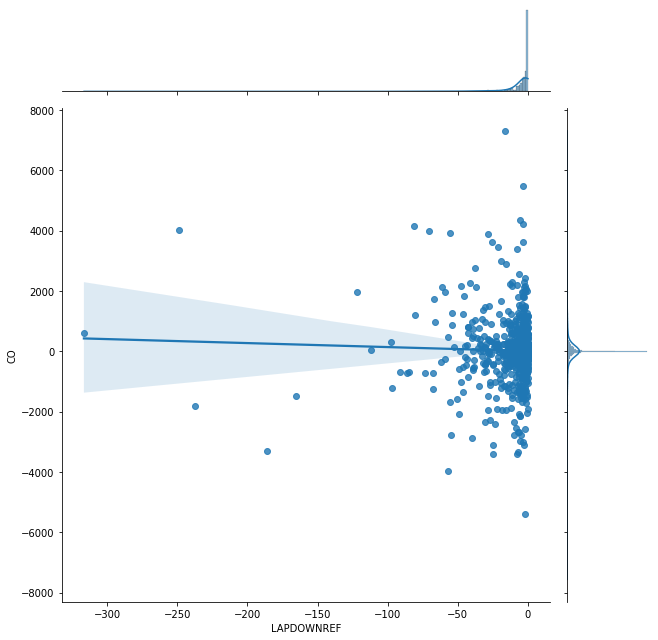

In [ ]:
sns.jointplot(x='LAPDOWNREF',y='CO', height=9,data=df, kind='reg')
print("emerge la tendenza a violare anche la close in un gap down ricolmato (quindi i prezzi aumentano)")

In [ ]:
#analisi del volume
#devo trovare altri dati la sbatta è che sono tutti a pagamento quindi per ora non ha nessuna efficacia questo studio

In [ ]:
'''from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='"f7acc30d79mshbe9a4e5d6e9ca7fp1486dajsn1eaadcd4547c"', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='S&P',interval='15min', outputsize='full')
#print(data)
df=pd.DataFrame(data)
df["Open"]=df["1. open"]
df["High"]=df["2. high"]
df["Low"]=df["3. low"]
df["Close"]=df["4. close"]
df["volume"]=df["5. volume"]
features=df.columns[5:]
df=df[features]
df['hour']=df.index.hour
df["body"]=abs(df.Close-df.Open)#estensione della candela e colore 

df.tail(75)'''
symbol='BTC-USD'
df = yf.download(  
        tickers = symbol,
        period = "3mo",# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max  (optional, default is '1mo')
        interval = "1h",# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo (optional, default is '1d')
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None)
df['hour']=df.index.hour
df["body"]=round((df.Close-df.Open),2)#estensione della candela e colore 
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,hour,body
2022-07-23 16:00:00,22215.970703,22279.763672,22213.009766,22230.810547,0,16,14.84
2022-07-23 17:00:00,22222.904297,22222.904297,22045.236328,22045.236328,223406080,17,-177.67
2022-07-23 18:00:00,22040.552734,22215.134766,22002.910156,22131.164062,453971968,18,90.61
2022-07-23 19:00:00,22113.931641,22294.740234,22090.197266,22293.361328,0,19,179.43
2022-07-23 20:00:00,22288.503906,22334.152344,22278.505859,22334.152344,0,20,45.65
...,...,...,...,...,...,...,...
2022-10-23 13:00:00,19154.681641,19175.173828,19153.154297,19174.783203,16676864,13,20.10
2022-10-23 14:00:00,19175.601562,19199.302734,19175.601562,19194.091797,138719232,14,18.49
2022-10-23 15:00:00,19191.744141,19206.572266,19186.902344,19191.892578,63349760,15,0.15
2022-10-23 16:00:00,19192.164062,19200.146484,19178.388672,19189.634766,39392256,16,-2.53


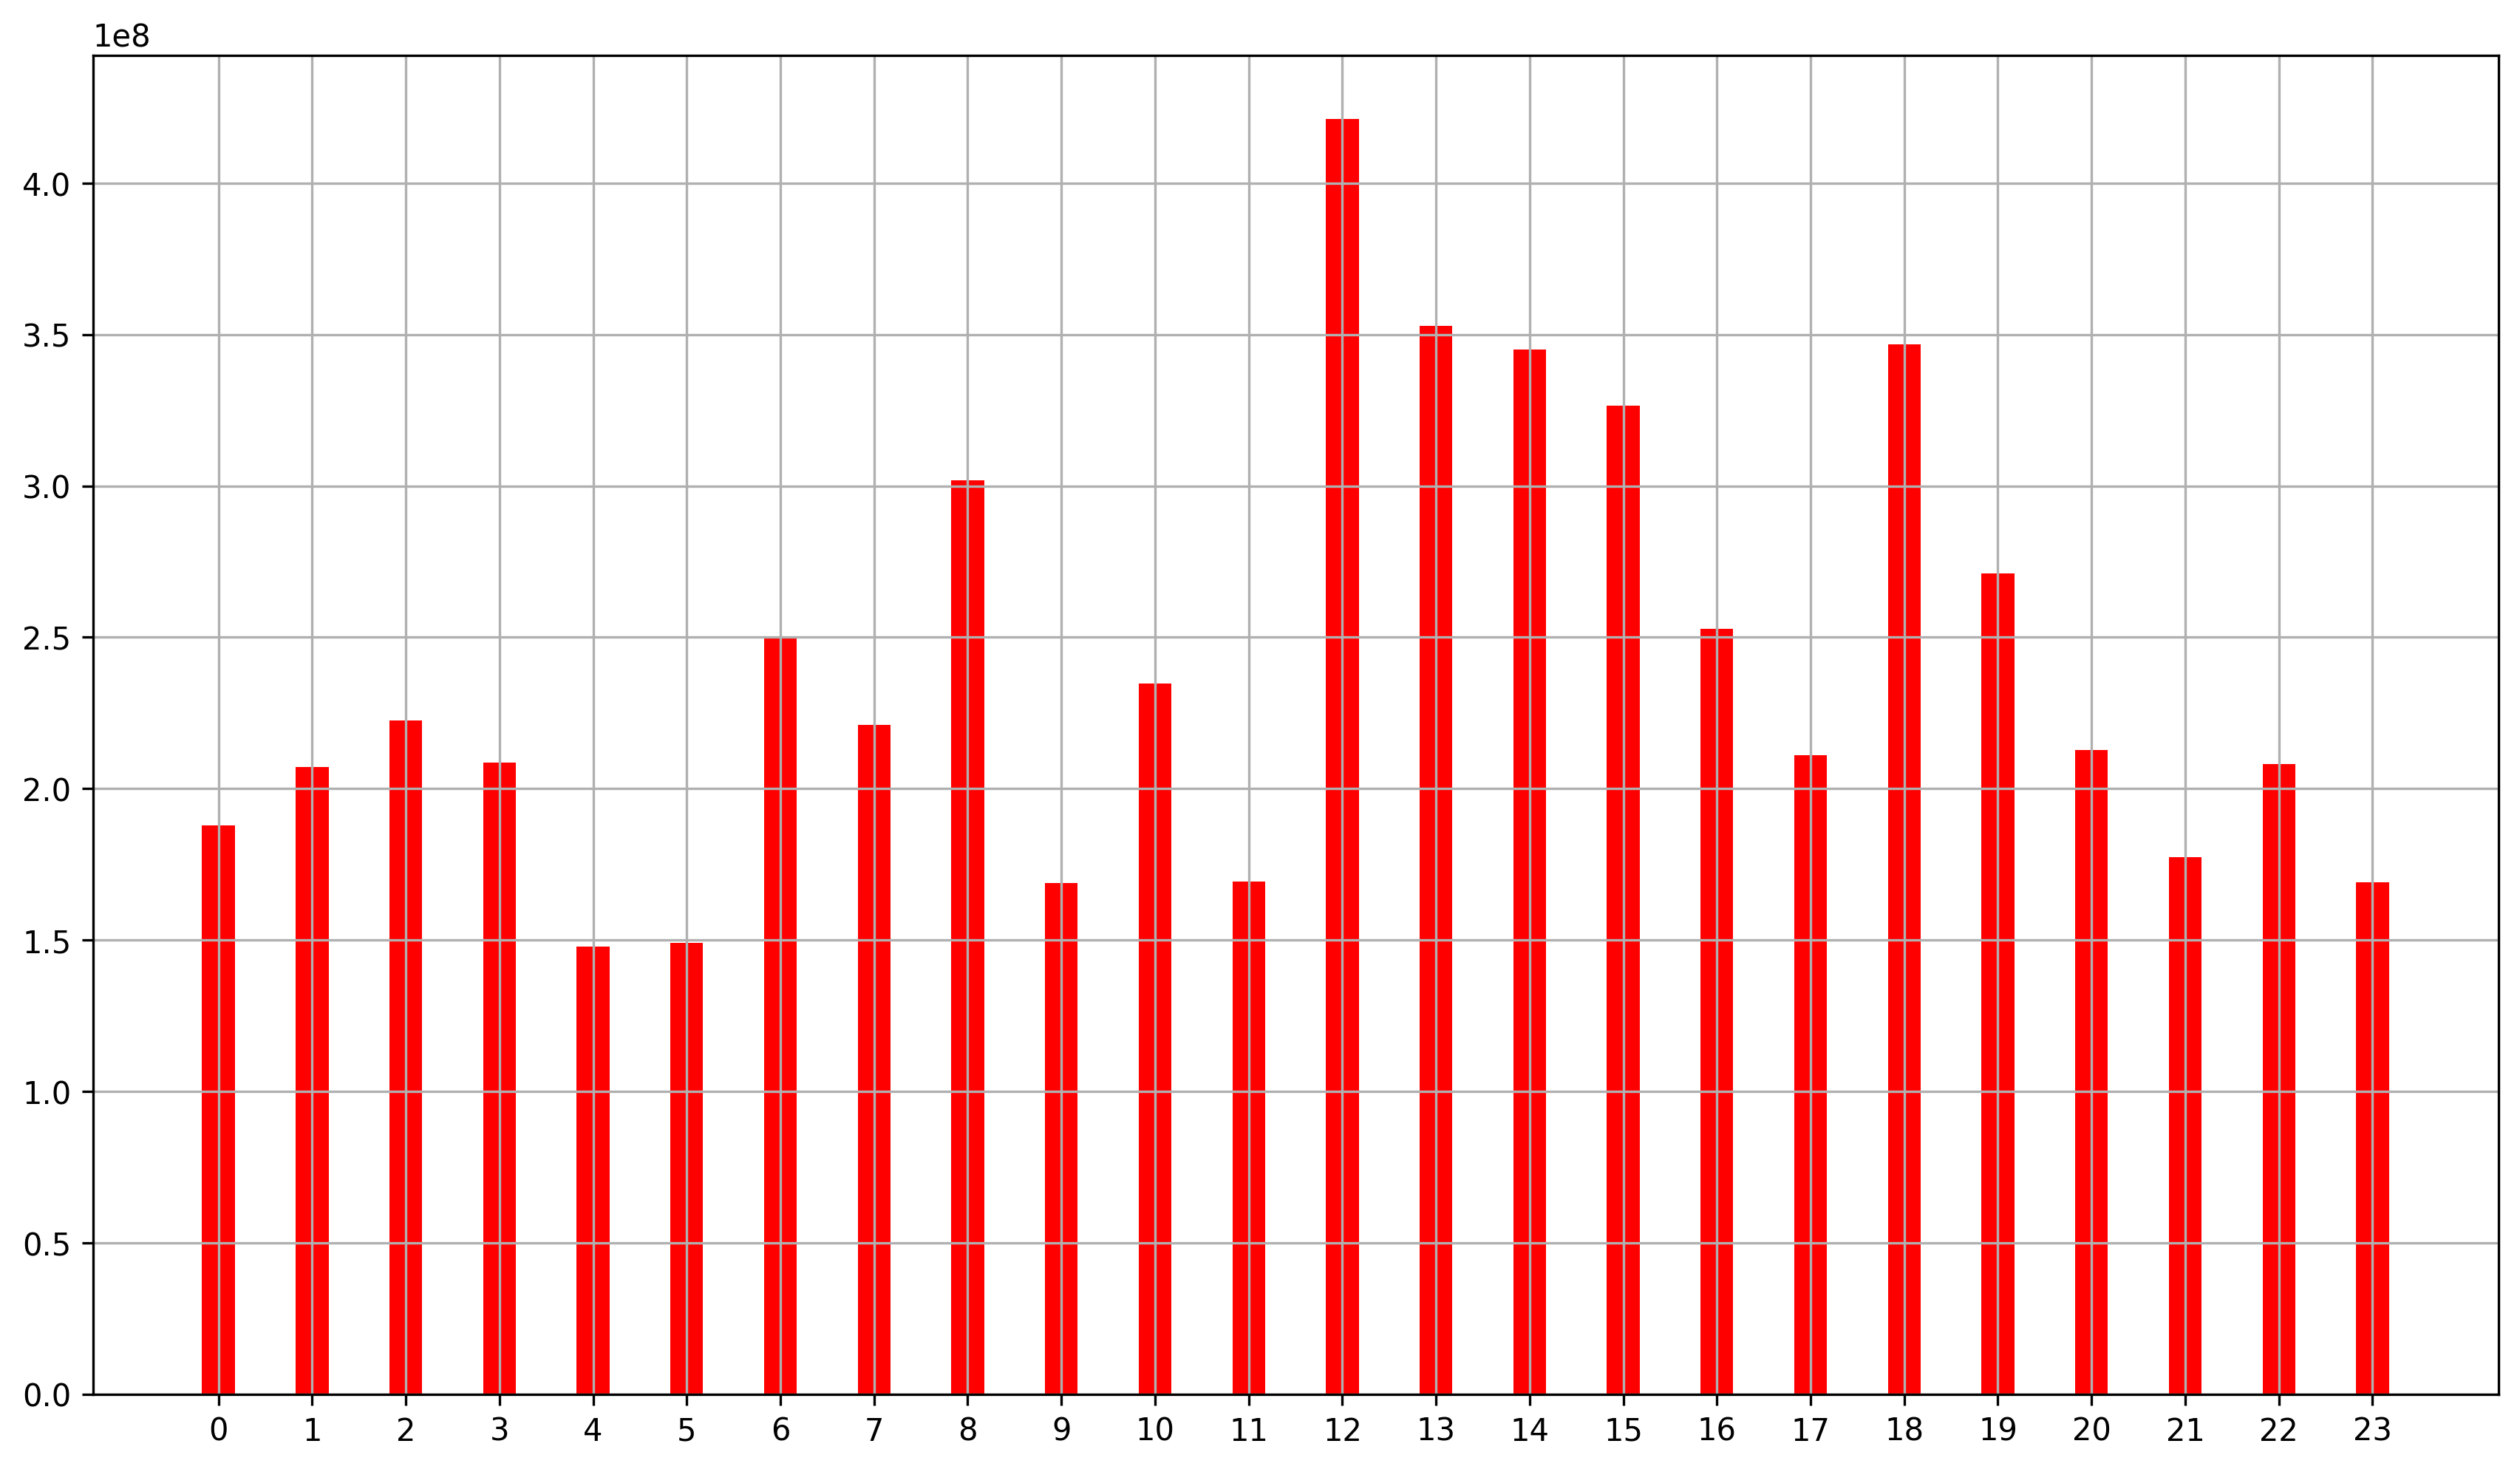

[0.4462231490968278,
 0.49186410459250335,
 0.5281410571161561,
 0.495113256660053,
 0.3508149795922148,
 0.35367203683778414,
 0.5933999155378479,
 0.5248785859014615,
 0.7169753311431506,
 0.4011319508937351,
 0.5572241249253929,
 0.4021692831834665,
 1.0,
 0.8375821682761228,
 0.8191863475720296,
 0.7753660948103778,
 0.6001837424659422,
 0.5008629680751561,
 0.8231468305629931,
 0.643901187556775,
 0.5050632481152068,
 0.4209398098948777,
 0.4942709543644325,
 0.40120480966176775]

In [ ]:
df[(df.hour==0)].Volume.head(10)
round(df[(df.hour==0)].Volume.mean(),2)
df[(df.hour==0)].Volume.count()
hours=[]
activity=[]
for hour in range (0,24):
    hours.append(hour)
    activity.append(round(df[(df.hour==hour)].Volume.mean(),2))
n_groups=24
#n_groups=8
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,activity,bar_width,alpha=opacity,color='red',label='ALL DATA CYRCLE')
ax.set_xlabel=('trading hours')
ax.set_ylabel=('volumes')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
#ax.set_xticklabels((['9','10','11','12','13','14','15','16','17']))
ax.grid(True)
plt.show()
def normalizedMinMax(array):
    normalied_array=[]
    for element in array:
        normalized_array.append((elements-min(array))/(max(array)-min(array)))
    return normalized_array
def normalizeMax(array):
    normalized_array=[]
    for elements in array:
        normalized_array.append(elements/max(array))
    return normalized_array
activity=np.where(np.isnan(activity), 0, activity)

normalize=True
if normalize==True:
    activity=normalizeMax(activity)
activity

In [ ]:
startDateLong='20220510'#anno mese data
endDateLong='20220810'
startDateMid='20220610'
endDateMid='20220810'
startDateShort='20220710'
endDateShort='20220810'
normalize=False

2022-05-10
2022-08-10


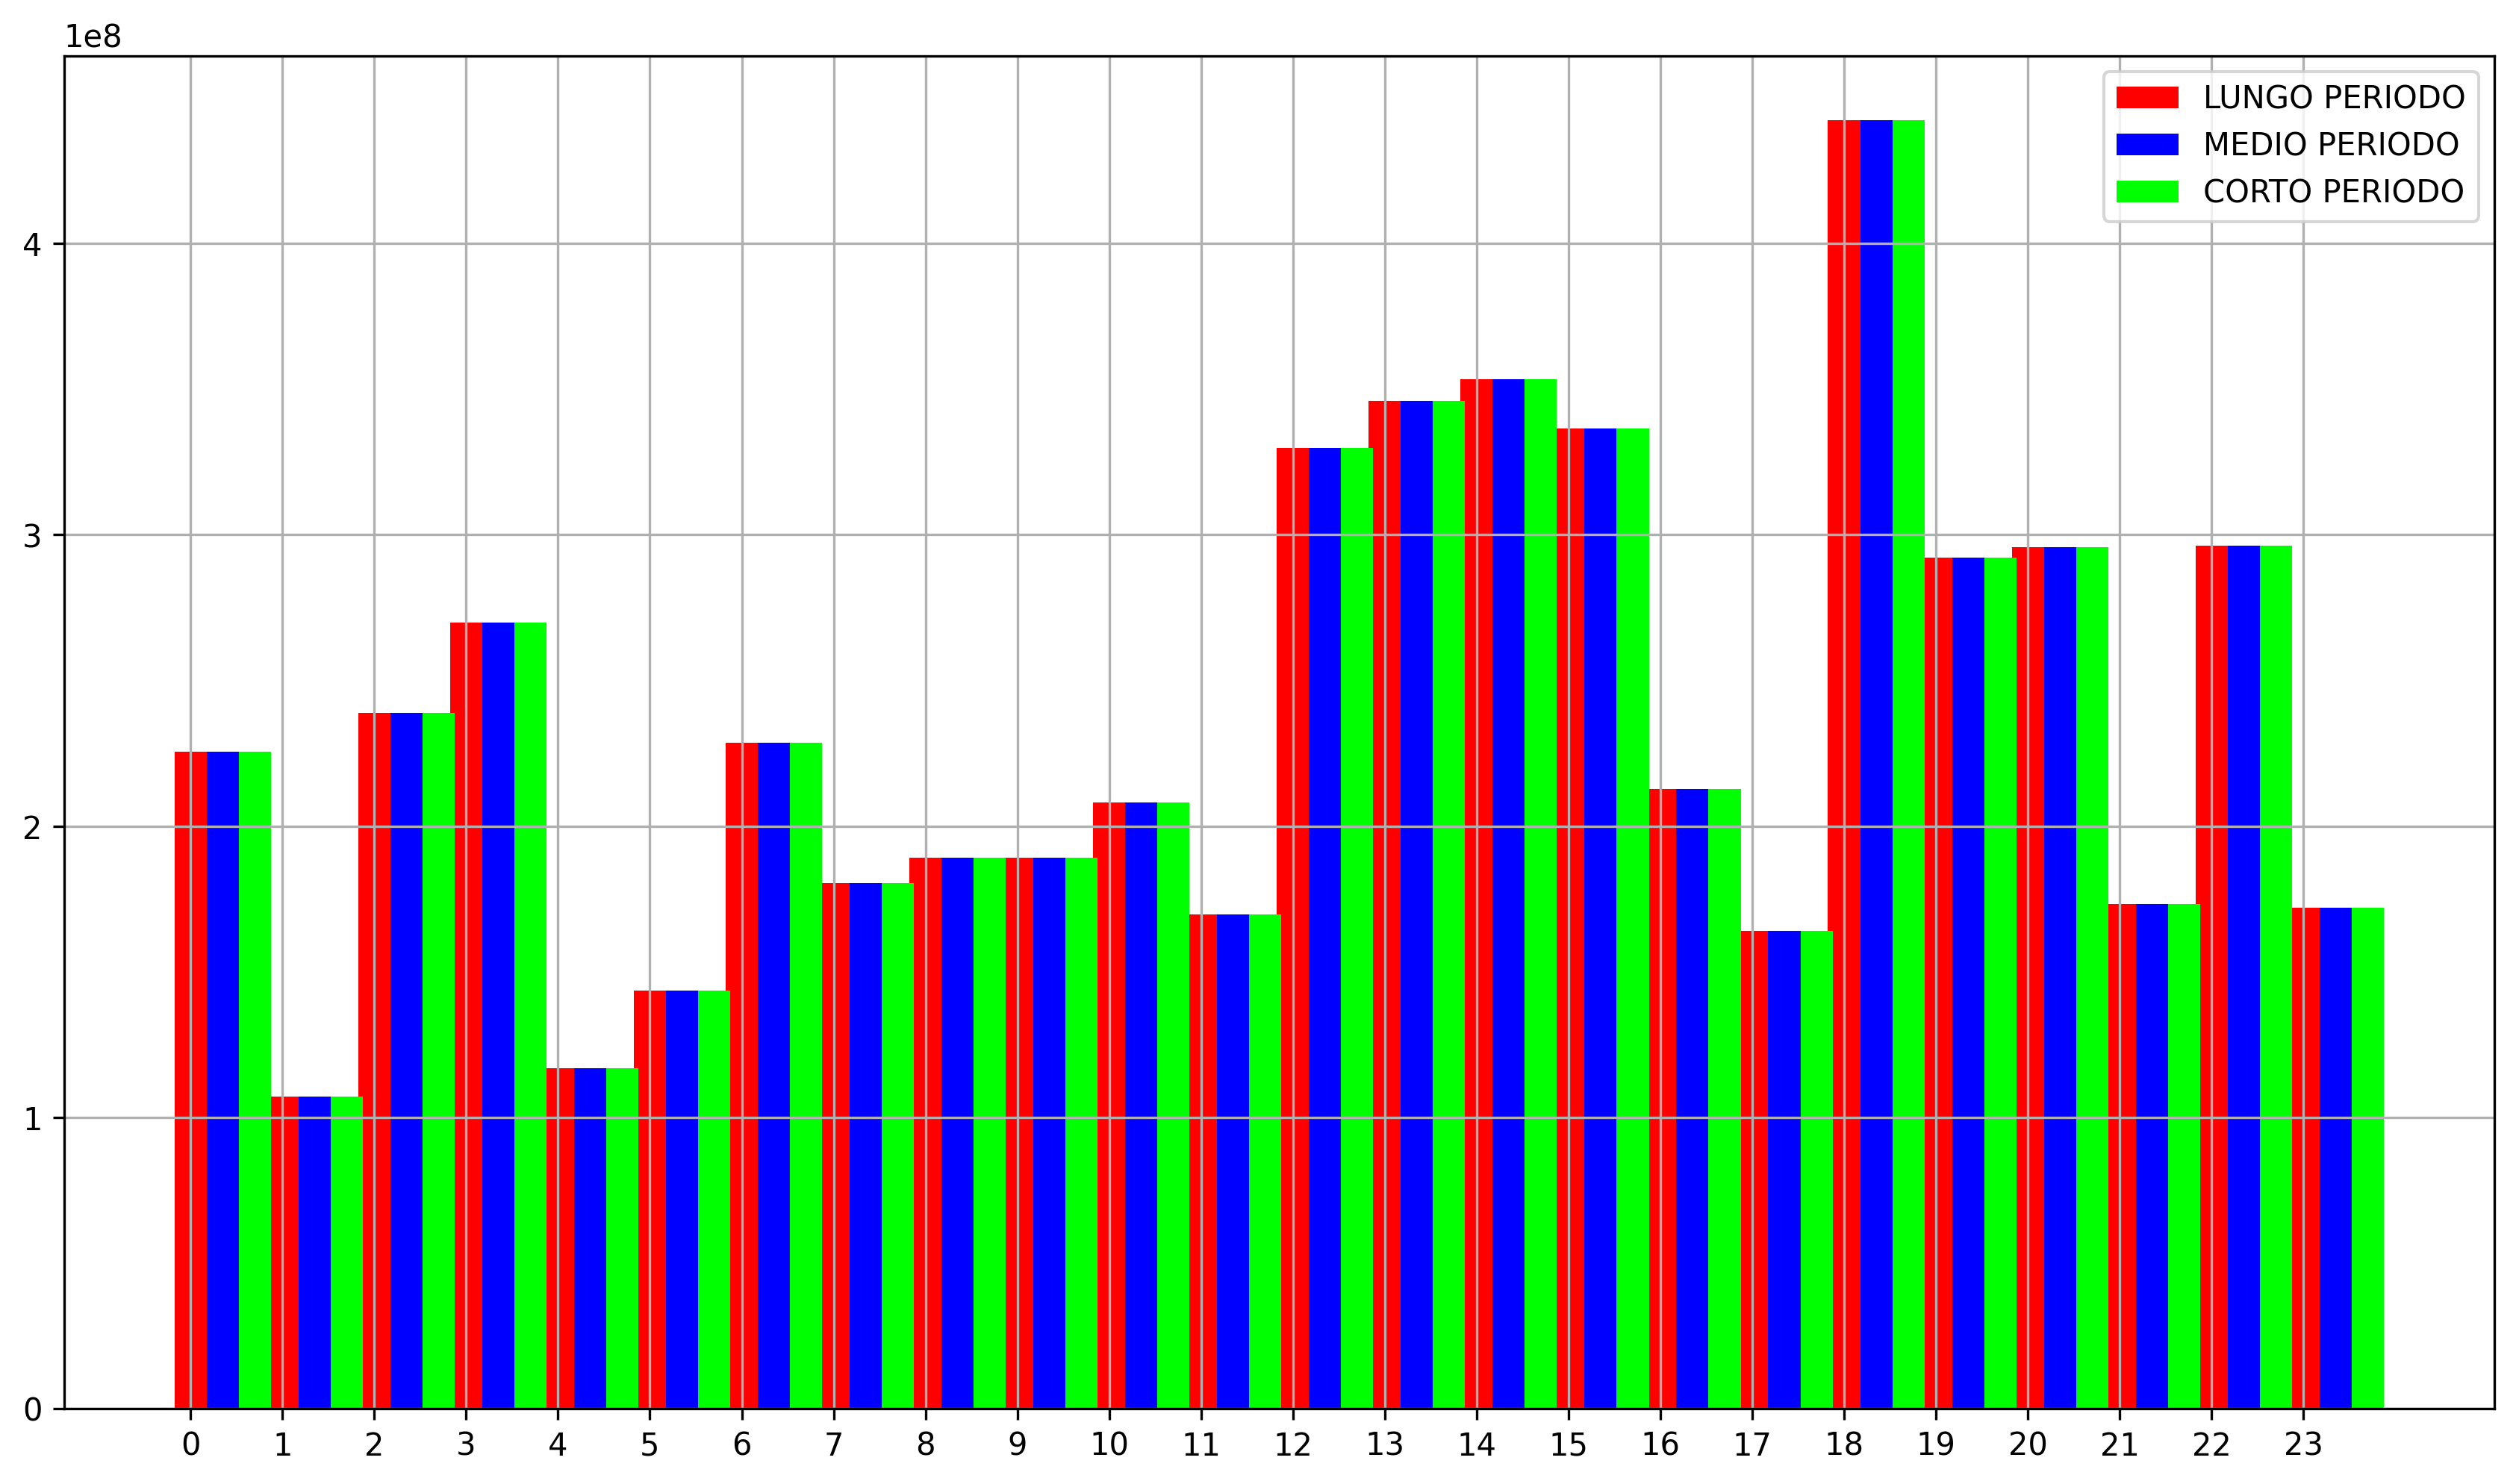

In [ ]:
import datetime 
startDateLongParsed=datetime.date(int(startDateLong[0:4]),int(startDateLong[4:6]),int(startDateLong[6:]))
endDateLongParsed=datetime.date(int(endDateLong[0:4]),int(endDateLong[4:6]),int(endDateLong[6:]))

startDateMidParsed=datetime.date(int(startDateMid[0:4]),int(startDateMid[4:6]),int(startDateMid[6:]))
endDateMidParsed=datetime.date(int(endDateMid[0:4]),int(endDateMid[4:6]),int(endDateMid[6:]))

startDateShortParsed=datetime.date(int(startDateShort[0:4]),int(startDateShort[4:6]),int(startDateShort[6:]))
endDateShortParsed=datetime.date(int(endDateShort[0:4]),int(endDateShort[4:6]),int(endDateShort[6:]))

print(startDateLongParsed)
print(endDateLongParsed)
instruments_Long=df.loc[(startDateLongParsed):(endDateLongParsed)]
#print(instrumets_Long)
instruments_Mid=df.loc[startDateMidParsed:endDateMidParsed]
instruments_Short=df.loc[startDateShortParsed:endDateShortParsed]

activity_long=[]
activity_mid=[]
activity_short=[]
hours=[]
for hour in range (0,24):
    hours.append(hour)
for hour in hours:
    activity_long.append(round(instruments_Long[(instruments_Long.hour==hour)].Volume.mean(),2))
    activity_mid.append(round(instruments_Mid[(instruments_Mid.hour==hour)].Volume.mean(),2))
    activity_short.append(round(instruments_Short[(instruments_Short.hour==hour)].Volume.mean(),2))
activity_long=np.where(np.isnan(activity_long), 0, activity_long)
activity_mid=np.where(np.isnan(activity_mid), 0, activity_mid)
activity_short=np.where(np.isnan(activity_short), 0, activity_short)
if normalize==True:
    activity_long=normalizeMax(activity_long)
    activity_mid=normalizeMax(activity_mid)
    activity_short=normalizeMax(activity_short)

n_groups=24
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,activity_long,bar_width,alpha=opacity,color='red',label='LUNGO PERIODO')
rectls2=ax.bar(index+bar_width,activity_mid,bar_width,alpha=opacity,color='blue',label='MEDIO PERIODO')
rectls3=ax.bar(index+2*bar_width,activity_short,bar_width,alpha=opacity,color='lime',label='CORTO PERIODO')

ax.set_xlabel=('trading hours')
if normalize==True:
    ax.set_ylabel('normalized volumes')
ax.set_ylabel=('volumes')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
#analisi oraria

In [ ]:
hour_bias=[]
#print(hours)
for hour in hours:
    hour_bias.append(round(df[(df.hour==hour)].body.mean(),2))
hour_bias=np.where(np.isnan(hour_bias), 0, hour_bias)        
def normalizeMaxMin(array):
    normalized_array=[]
    for elements in array:
        if elements>0:
            normalized_array.append(elements/max(array))
        else:
            normalized_array.append(-elements/(min(array)))#[array!=0]
    return normalized_array
normalize=True
if normalize==True:
    hour_bias=normalizeMaxMin(hour_bias)
hour_bias
#se il body è >0 allora la tendenza media sarà di salita in quell'orario

[-0.33279742765273307,
 0.7836370686312525,
 -0.16270096463022507,
 0.21442419542458319,
 0.7018224117875146,
 0.290034897246995,
 -0.6282958199356913,
 0.08491663435440093,
 0.0632027917797596,
 0.19426134160527336,
 0.020938348196975574,
 -0.009003215434083603,
 -0.15819935691318326,
 -0.2363344051446945,
 -0.1964630225080386,
 0.47654129507561066,
 -0.5221864951768488,
 -0.907717041800643,
 -0.0009646302250803858,
 0.32570763861962004,
 1.0,
 -1.0,
 0.17875145405195814,
 -0.4109324758842443]

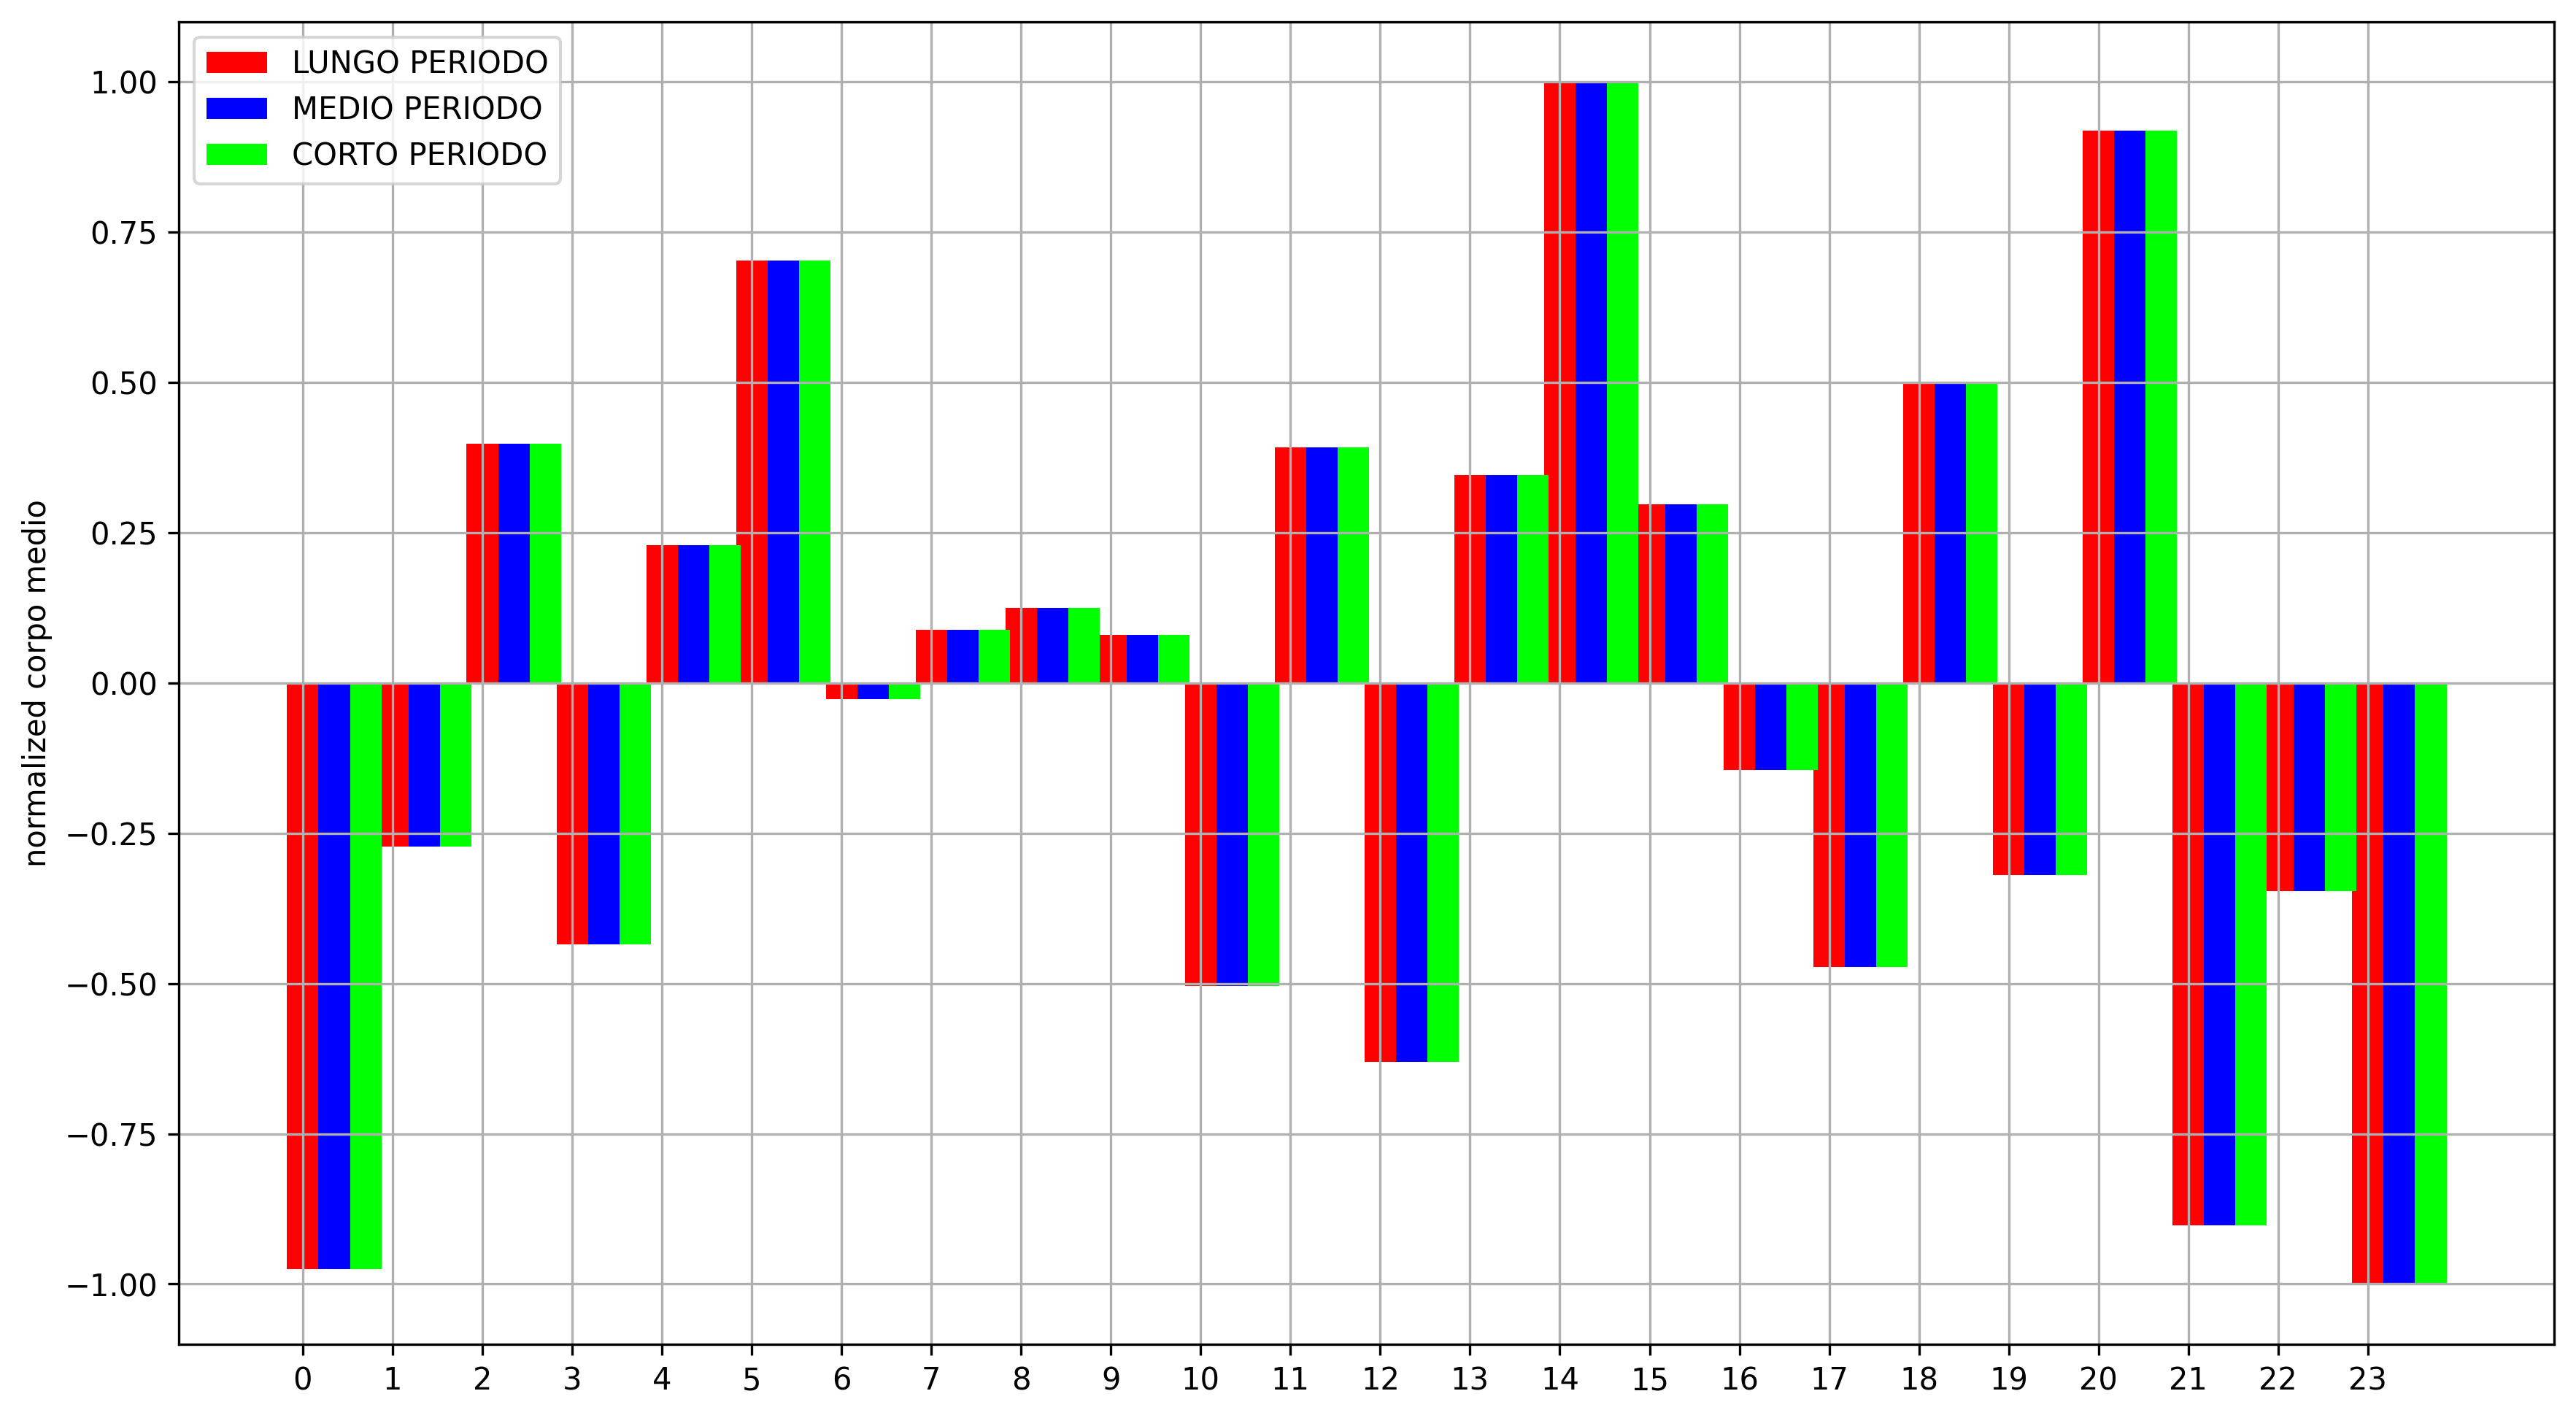

In [ ]:
startDateLongParsed=datetime.date(int(startDateLong[0:4]),int(startDateLong[4:6]),int(startDateLong[6:]))
endDateLongParsed=datetime.date(int(endDateLong[0:4]),int(endDateLong[4:6]),int(endDateLong[6:]))

startDateMidParsed=datetime.date(int(startDateMid[0:4]),int(startDateMid[4:6]),int(startDateMid[6:]))
endDateMidParsed=datetime.date(int(endDateMid[0:4]),int(endDateMid[4:6]),int(endDateMid[6:]))

startDateShortParsed=datetime.date(int(startDateShort[0:4]),int(startDateShort[4:6]),int(startDateShort[6:]))
endDateShortParsed=datetime.date(int(endDateShort[0:4]),int(endDateShort[4:6]),int(endDateShort[6:]))

instruments_Long=df.loc[startDateLongParsed:endDateLongParsed]
instruments_Mid=df.loc[startDateMidParsed:endDateMidParsed]
instruments_Short=df.loc[startDateShortParsed:endDateShortParsed]

hour_bias_long=[]
hour_bias_mid=[]
hour_bias_short=[]
for hour in hours:
    hour_bias_long.append(round(instruments_Long[(instruments_Long.hour==hour)].body.mean(),2))
    hour_bias_mid.append(round(instruments_Mid[(instruments_Mid.hour==hour)].body.mean(),2))
    hour_bias_short.append(round(instruments_Short[(instruments_Short.hour==hour)].body.mean(),2))
    
#hour_bias_long=np.where(np.isnan(hour_bias_long), 0, hour_bias_long)
#hour_bias_mid=np.where(np.isnan(hour_bias_mid), 0, hour_bias_mid)
#hour_bias_short=np.where(np.isnan(hour_bias_short), 0, hour_bias_short)

#hour_bias_long=hour_bias_long[hour_bias_long>0]
#hour_bias_mid=hour_bias_mid[hour_bias_mid>0]
#hour_bias_short=hour_bias_short[hour_bias_short>0]

if normalize==True:
    hour_bias_long=normalizeMaxMin(hour_bias_long)
    hour_bias_mid=normalizeMaxMin(hour_bias_mid)
    hour_bias_short=normalizeMaxMin(hour_bias_short)

n_groups=24
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,hour_bias_long,bar_width,alpha=opacity,color='red',label='LUNGO PERIODO')
rectls2=ax.bar(index+bar_width,hour_bias_mid,bar_width,alpha=opacity,color='blue',label='MEDIO PERIODO')
rectls3=ax.bar(index+2*bar_width,hour_bias_short,bar_width,alpha=opacity,color='lime',label='CORTO PERIODO')

ax.set_xlabel=('trading hours')
if normalize==True:
    ax.set_ylabel('normalized corpo medio')
ax.set_ylabel=('corpo medio')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
ax.legend()
ax.grid(True)
plt.show()


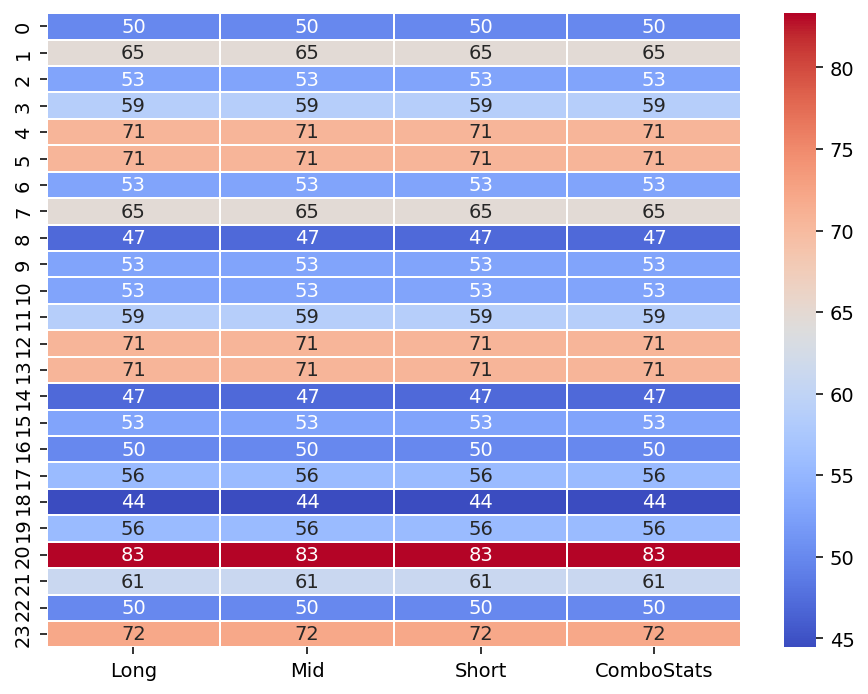

In [ ]:
def percPosNeg(array,soglia):
    if len(array)==0:
        return 0,0
    contapos=0
    contaneg=0
    for el in array:
        if el>soglia:
            contapos+=1
        if el<=soglia:
            contaneg+=1
    return round(contapos/len(array)*100,2),round(contaneg/len(array)*100,2)
body_statistics_long=[]
body_statistics_mid=[]
body_statistics_short=[]
for hour in hours:
    if instruments_Long[(instruments_Long.hour==hour)].body.count()!=0:
        if instruments_Long[(instruments_Long.hour==hour)].body.mean()>0:
            body_statistics_long.append(round(percPosNeg(instruments_Long[(instruments_Long.hour==hour)]['body'],0)[0],2))
        if instruments_Long[(instruments_Long.hour==hour)].body.mean()<=0:
            body_statistics_long.append(round(percPosNeg(instruments_Long[(instruments_Long.hour==hour)]['body'],0)[1],2))
    else:
        body_statistics_long.append(0)
        
    if instruments_Mid[(instruments_Mid.hour==hour)].body.count()!=0:
        if instruments_Mid[(instruments_Mid.hour==hour)].body.mean()>0:
            body_statistics_mid.append(round(percPosNeg(instruments_Mid[(instruments_Mid.hour==hour)]['body'],0)[0],2))
        if instruments_Mid[(instruments_Mid.hour==hour)].body.mean()<=0:
            body_statistics_mid.append(round(percPosNeg(instruments_Mid[(instruments_Mid.hour==hour)]['body'],0)[1],2))
    else:
        body_statistics_mid.append(0)

    if instruments_Short[(instruments_Short.hour==hour)].body.count()!=0:
        if instruments_Short[(instruments_Short.hour==hour)].body.mean()>0:
            body_statistics_short.append(round(percPosNeg(instruments_Short[(instruments_Short.hour==hour)]['body'],0)[0],2))
        if instruments_Short[(instruments_Short.hour==hour)].body.mean()<=0:
            body_statistics_short.append(round(percPosNeg(instruments_Short[(instruments_Short.hour==hour)]['body'],0)[1],2))
    else:
        body_statistics_short.append(0)
body_matrix=[]
body_matrix.append(body_statistics_long)
body_matrix.append(body_statistics_mid)
body_matrix.append(body_statistics_short)
results_matrix=pd.DataFrame(body_matrix).transpose()
results_matrix.columns=['Long','Mid','Short']
results_matrix=results_matrix[results_matrix>0].dropna()
results_matrix['ComboStats']=round((3*results_matrix['Long']+2*results_matrix['Mid']+1*results_matrix['Short'])/6,2)
figure,ax=plt.subplots(figsize=(8,6),dpi=140)
sns.heatmap(results_matrix,annot=True,linewidth=0.5,cmap='coolwarm')
plt.show()    

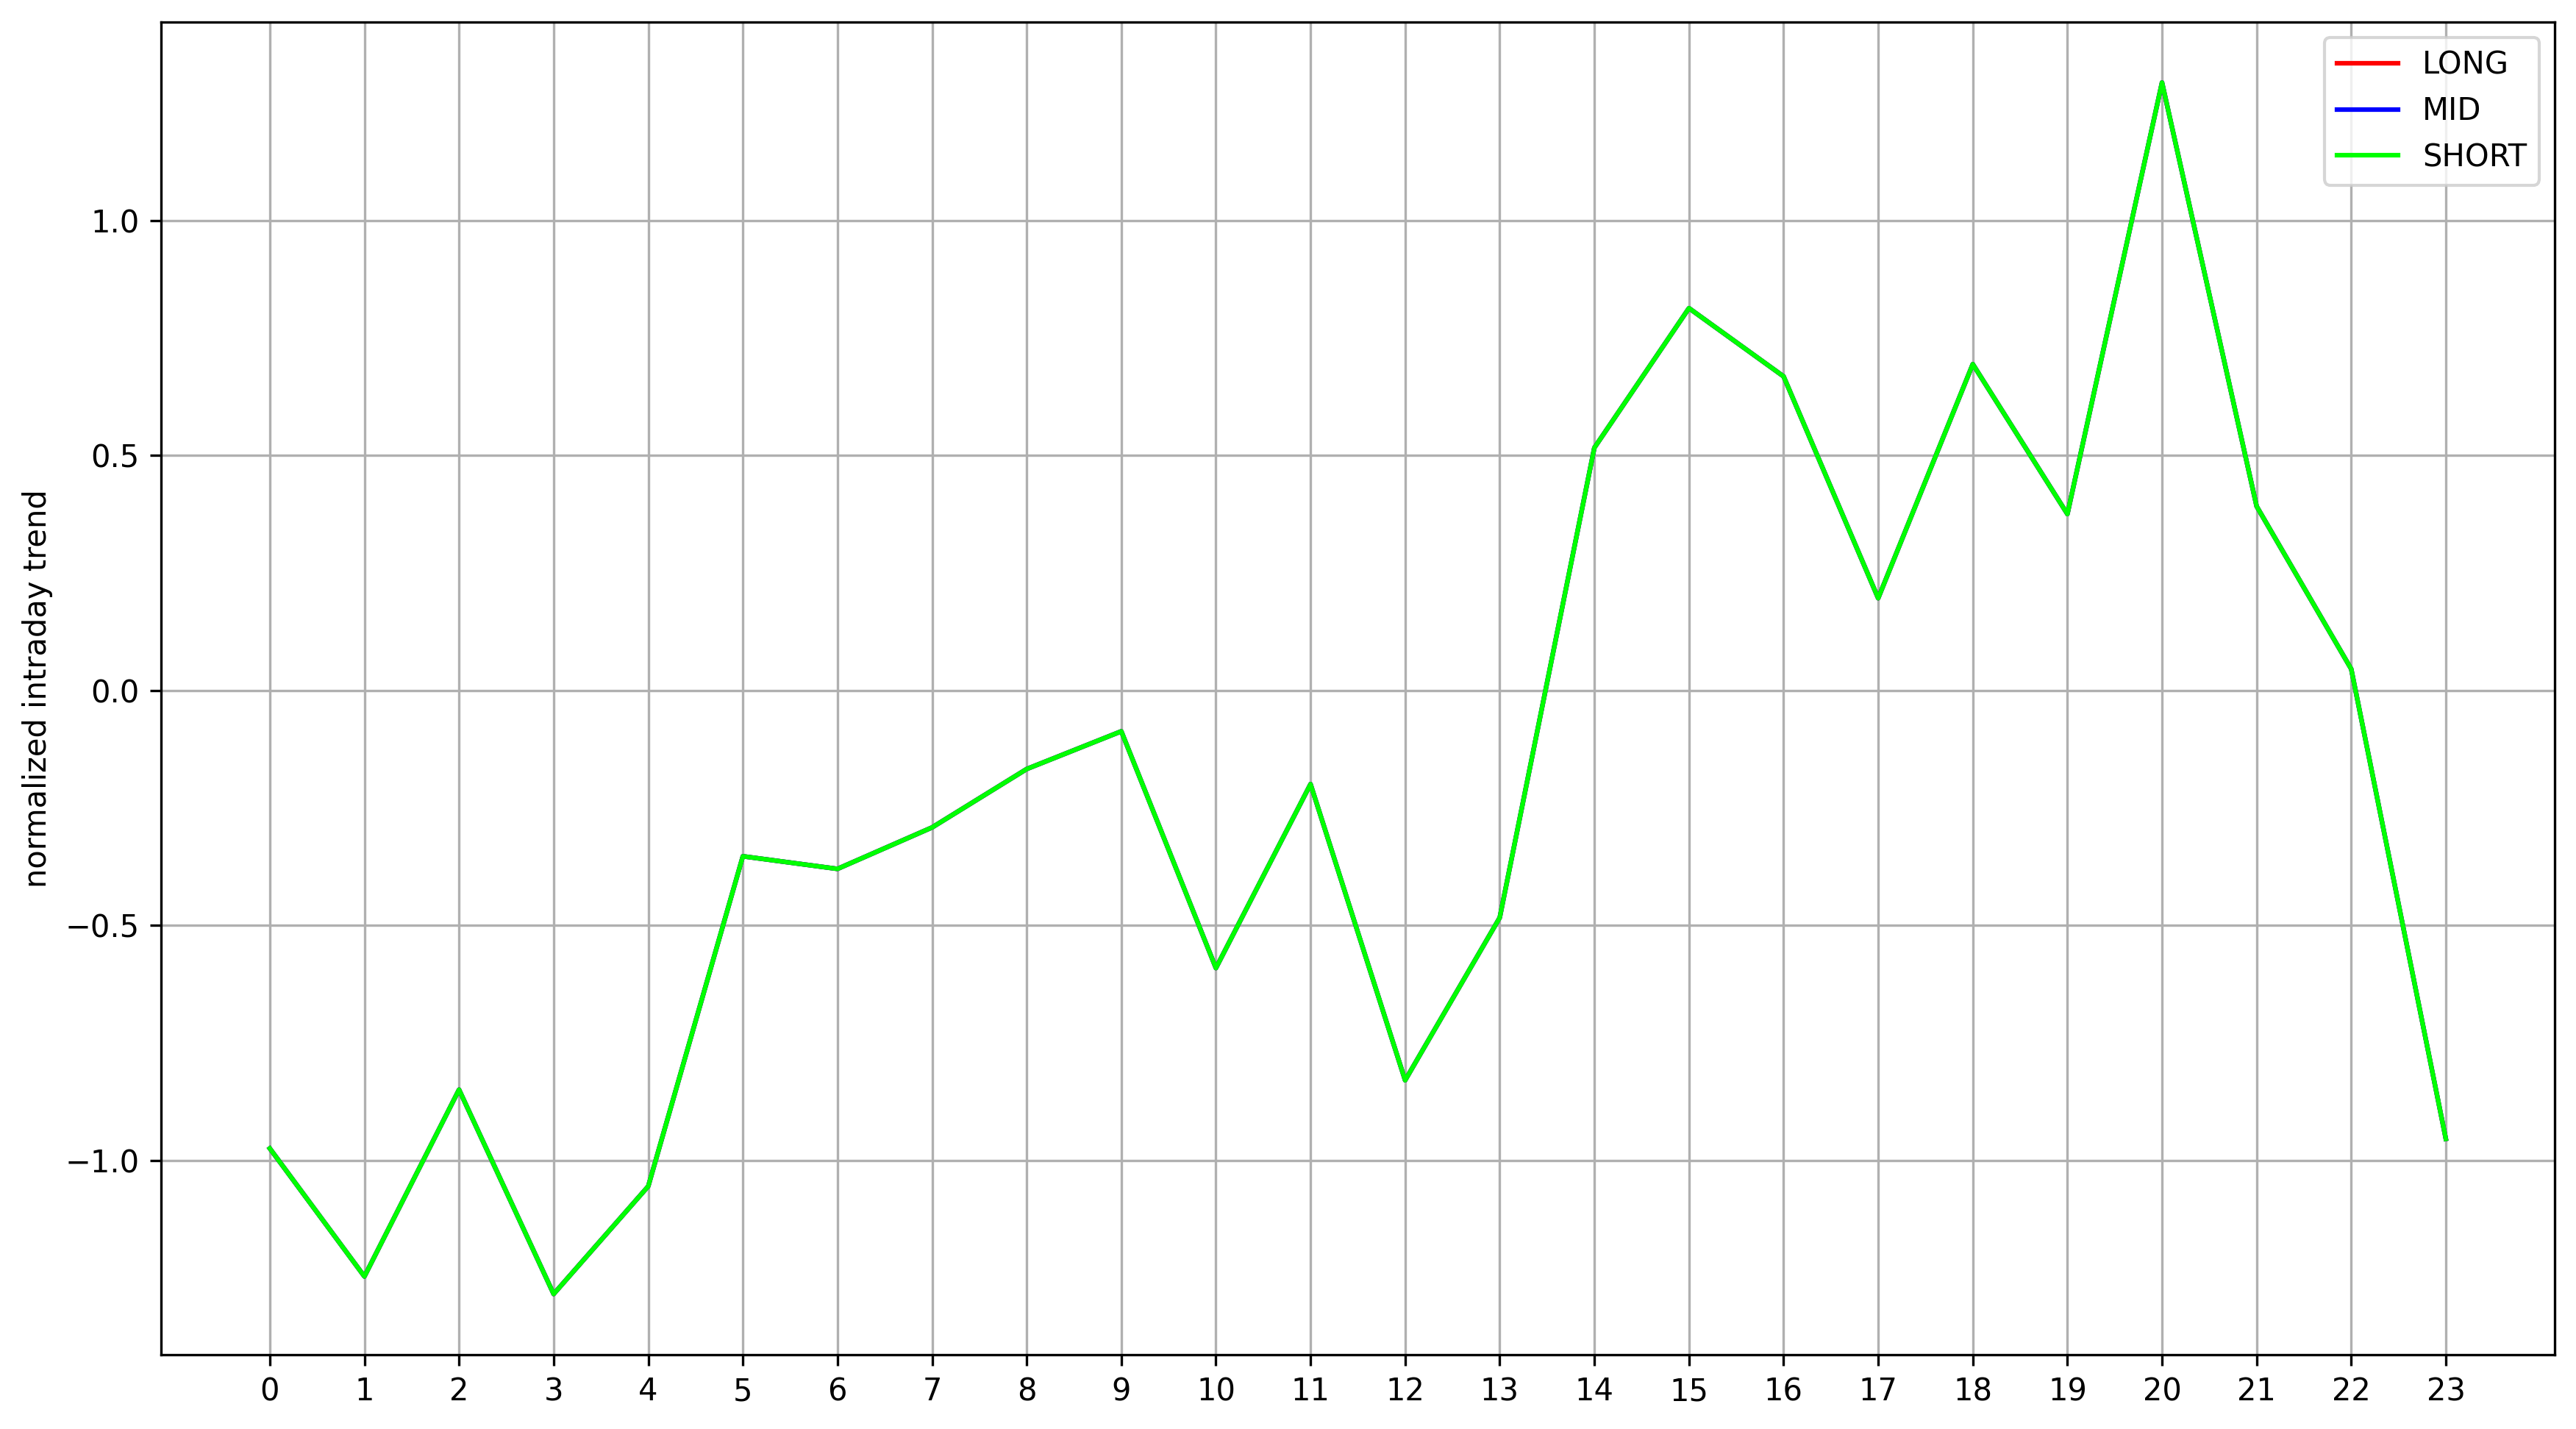

In [ ]:
trend=[]
trend.append(hour_bias_long)
trend.append(hour_bias_mid)
trend.append(hour_bias_short)
trend_dataframe=pd.DataFrame(trend).transpose()
trend_dataframe.columns=['Long','Mid','Short']
trend_dataframe['LongTrend']=trend_dataframe.Long.cumsum()
trend_dataframe['MidTrend']=trend_dataframe.Mid.cumsum()
trend_dataframe['ShortTrend']=trend_dataframe.Short.cumsum()
def plot_line(long,mid,short):
    n_groups=24
    fig,ax=plt.subplots(figsize=(14,8),dpi=300)
    index=np.arange(n_groups)
    bar_width=0.30
    opacity=1
    rectls1=plt.plot(long,color='red',label='LONG')
    rectls2=plt.plot(mid,color='blue',label='MID')
    rectls3=plt.plot(short,color='lime',label='SHORT')
    ax.set_xlabel=('trading hours')
    if normalize==True:
        ax.set_ylabel('normalized intraday trend')
    else:
        ax.set_ylabel=('intraday trend')
    ax.legend()
    ax.set_xticks(index)
    ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
    ax.grid(True)
    plt.show()
    return
plot_line(trend_dataframe.LongTrend,trend_dataframe.MidTrend,trend_dataframe.ShortTrend)

In [ ]:
#analisi settimanale

In [ ]:
#elementi ciclici sul giorno della settimana
df['DOM']=df.index.day
df['DOW']=df.index.dayofweek
df['Week']=df.index.week
df['Month']=df.index.month
df['DeltaClosePerc']=round((df.Open-df.Close.shift(1))/df.Close.shift(1)*100,2)
df['CloseOpenPerc']=round((-df.Open+df.Close)/df.Open*100,2)
daily=df.iloc[:,7:].resample('D').mean()
daily['DailyCloseOpenPerc']=df.resample('D')['CloseOpenPerc'].sum()
daily['DailyDeltaClosePerc']=df.resample('D')['DeltaClosePerc'].sum()
daily

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc,DailyCloseOpenPerc,DailyDeltaClosePerc
2022-07-23,23.0,5.0,29.0,7.0,-2.714286e-02,0.170000,1.36,-1.900000e-01
2022-07-24,24.0,6.0,29.0,7.0,1.250000e-03,0.027500,0.66,3.000000e-02
2022-07-25,25.0,0.0,30.0,7.0,-5.782412e-19,-0.237500,-5.70,-1.387779e-17
2022-07-26,26.0,1.0,30.0,7.0,7.916667e-03,-0.035833,-0.86,1.900000e-01
2022-07-27,27.0,2.0,30.0,7.0,2.125000e-02,0.307083,7.37,5.100000e-01
...,...,...,...,...,...,...,...,...
2022-10-19,19.0,2.0,42.0,10.0,4.166667e-04,-0.042500,-1.02,1.000000e-02
2022-10-20,20.0,3.0,42.0,10.0,2.083333e-03,-0.020000,-0.48,5.000000e-02
2022-10-21,21.0,4.0,42.0,10.0,1.333333e-02,0.013750,0.33,3.200000e-01
2022-10-22,22.0,5.0,42.0,10.0,8.333333e-04,0.006250,0.15,2.000000e-02


In [ ]:
daily['DailyCloseOpenPerc'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    93.000000
mean     -0.113011
std       2.746912
min     -10.560000
10%      -2.366000
20%      -1.158000
30%      -0.768000
40%      -0.572000
50%      -0.310000
60%       0.164000
70%       0.790000
80%       1.360000
90%       2.632000
max      10.090000
Name: DailyCloseOpenPerc, dtype: float64

In [ ]:
daily['DailyDeltaClosePerc'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    93.000000
mean     -0.013656
std       0.183094
min      -0.510000
10%      -0.238000
20%      -0.130000
30%      -0.070000
40%      -0.040000
50%      -0.010000
60%       0.020000
70%       0.050000
80%       0.076000
90%       0.190000
max       0.530000
Name: DailyDeltaClosePerc, dtype: float64

In [ ]:
dow={"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}
biasWeeklyIntraday=[]
biasWeeklyOverNight=[]
for dkey,dvalue in dow.items():
    biasWeeklyIntraday.append(daily[(daily['DOW']==dvalue)]['DailyCloseOpenPerc'].mean())
    biasWeeklyOverNight.append(daily[(daily['DOW']==dvalue)]['DailyDeltaClosePerc'].mean())
print("")
print("Intraday:")
print(len(biasWeeklyIntraday))
print(biasWeeklyIntraday)
print("")
print("Overnight:")
print(len(biasWeeklyOverNight))
print(biasWeeklyOverNight)


Intraday:
7
[0.5623076923076924, -1.7646153846153845, 0.7792307692307694, 0.5000000000000001, -0.486923076923077, -0.08785714285714286, -0.2821428571428571]

Overnight:
7
[-0.015384615384615385, -0.14230769230769233, 0.03846153846153847, 0.009230769230769233, 0.036153846153846154, -0.024999999999999988, 0.002857142857142856]


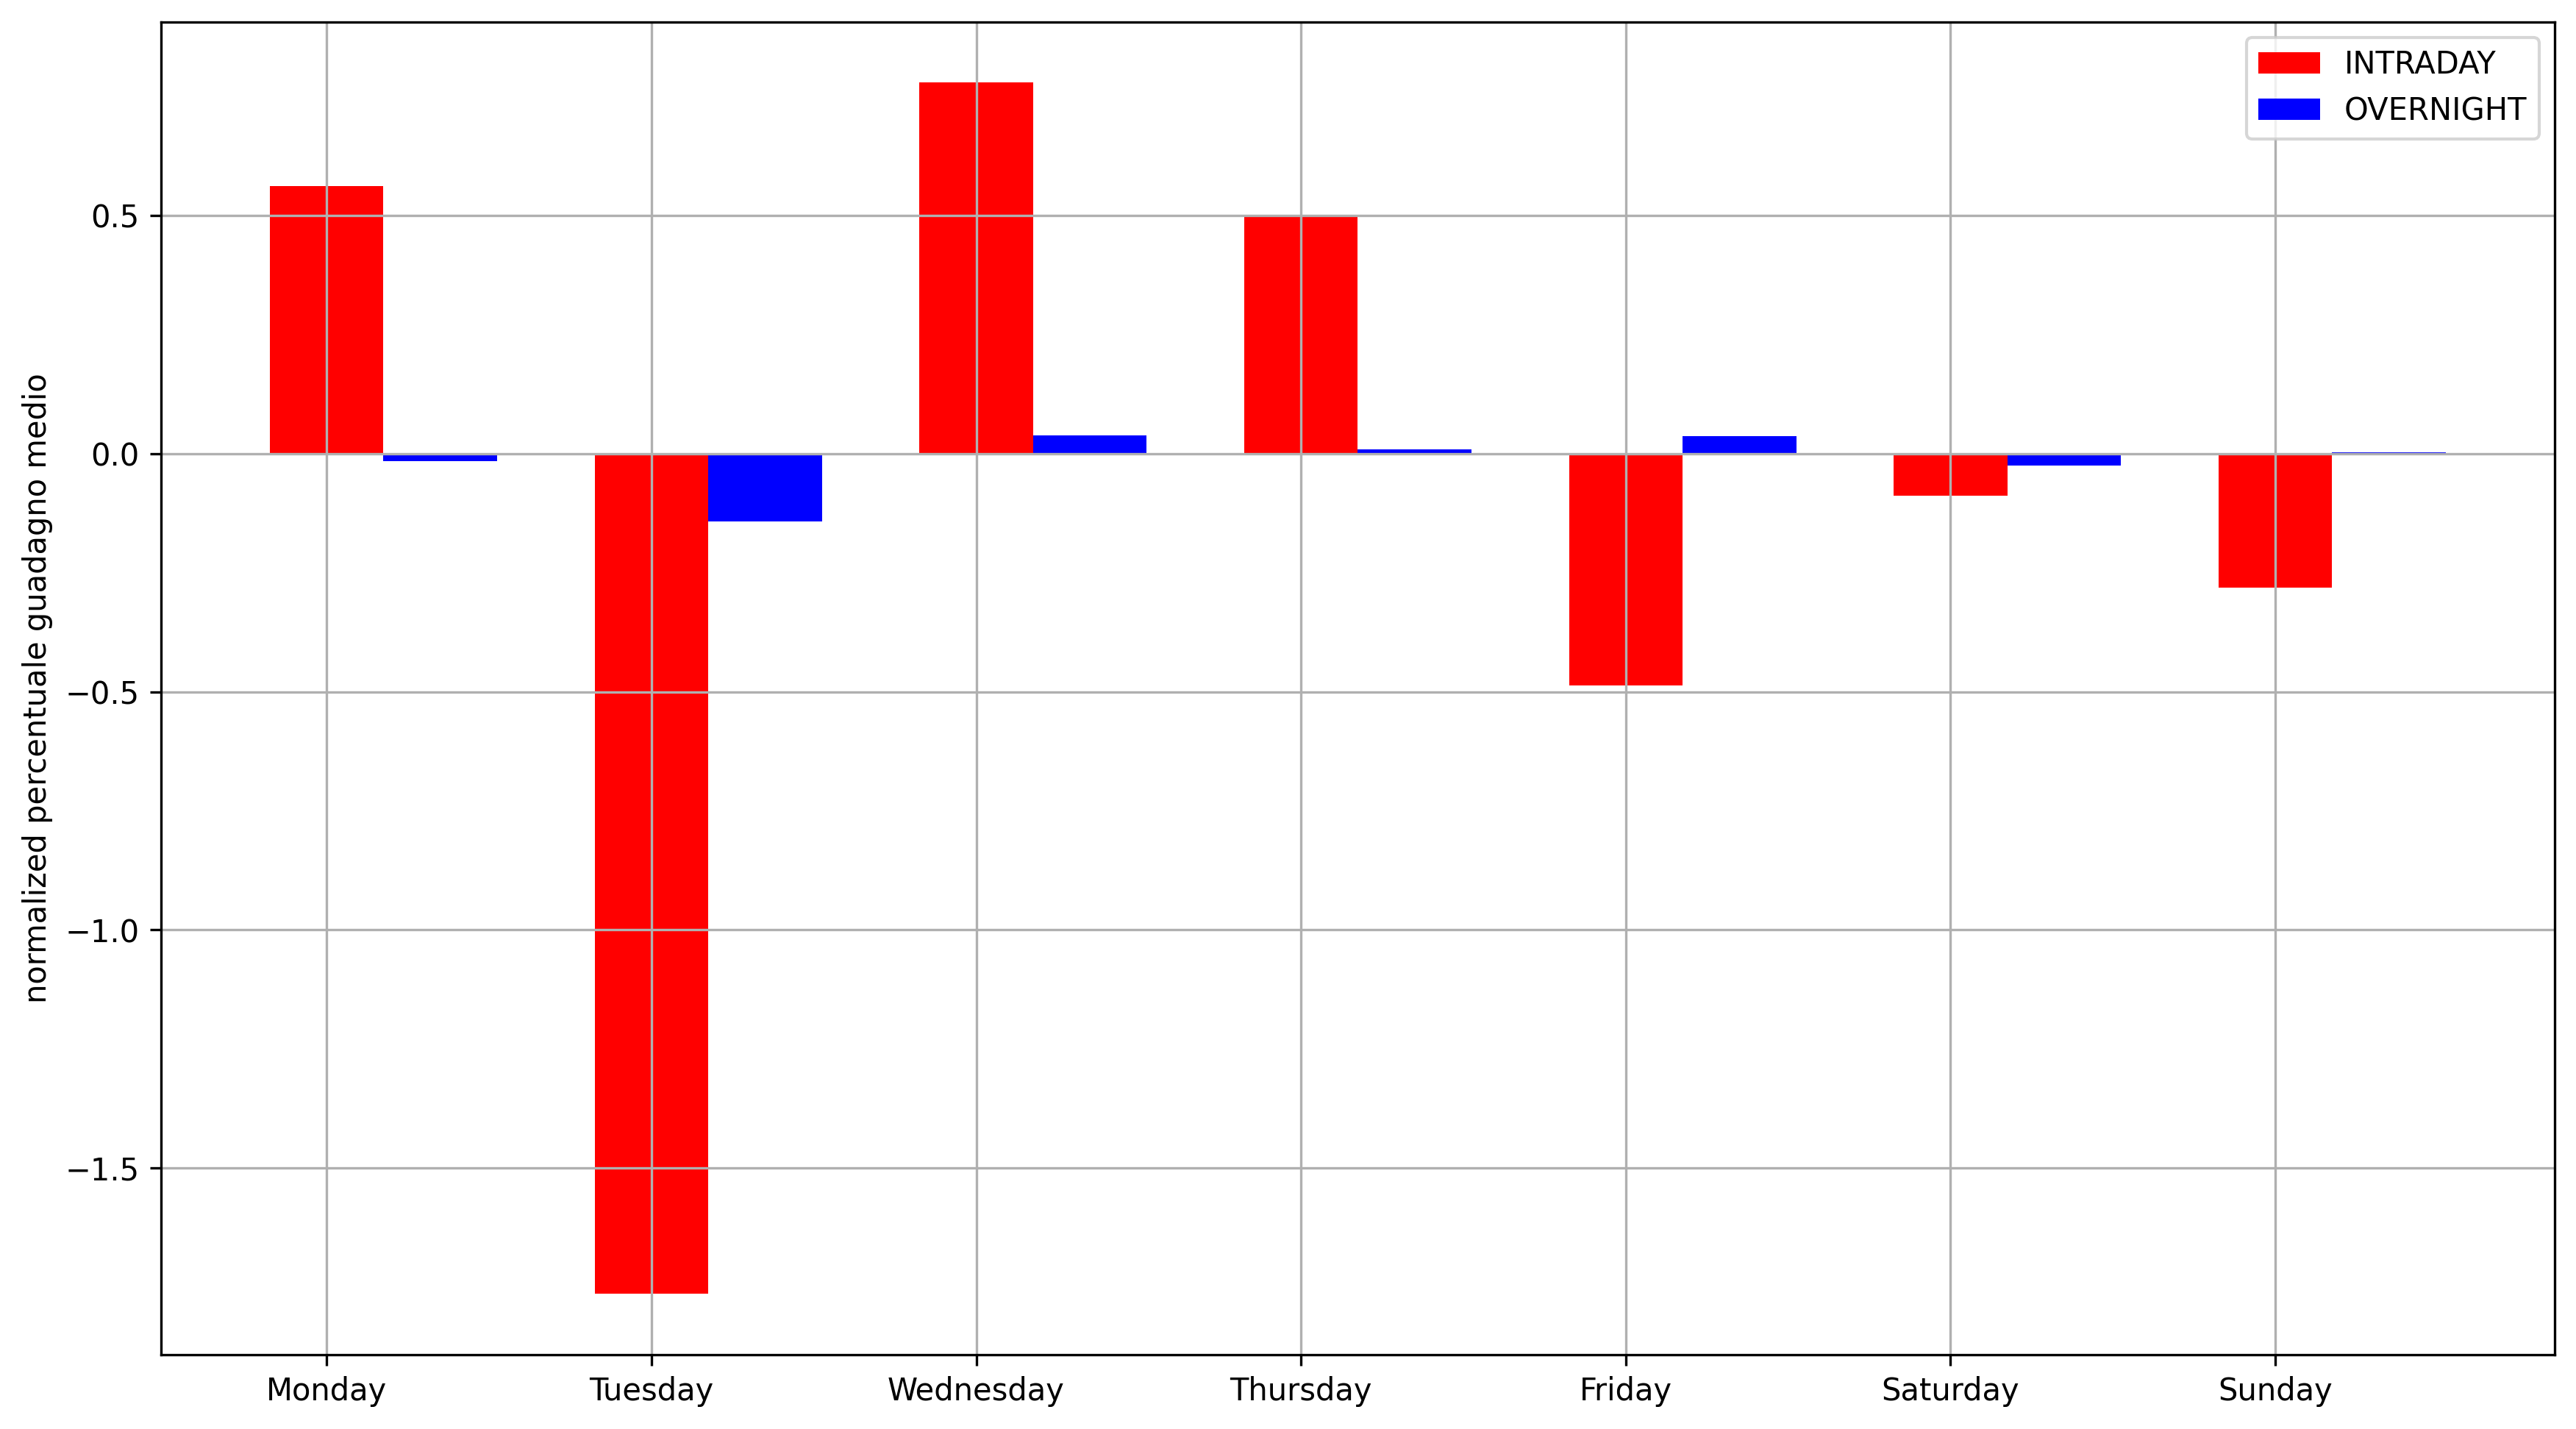

In [ ]:
n_groups=7
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,biasWeeklyIntraday,bar_width,alpha=opacity,color='red',label='INTRADAY')
rectls1=ax.bar(index+bar_width,biasWeeklyOverNight,bar_width,alpha=opacity,color='blue',label='OVERNIGHT')

ax.set_xlabel=('giorno della settimana')
if normalize==True:
    ax.set_ylabel('normalized percentuale guadagno medio')
ax.set_ylabel=('percentuale di guadagno medio')
ax.set_xticks(index)
ax.set_xticklabels((["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))
ax.legend()
ax.grid(True)
plt.show()
#c'è un bias??

In [ ]:
dow={"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}
DayOfWeek_Intraday=[]
DayOfWeek_Overnight=[]

daysofweek_names=list(dow.keys())
for dkey,dvalue in dow.items():   
    intraday=daily[(daily['DOW']==dvalue)]['DailyCloseOpenPerc'].dropna()
    DayOfWeek_Intraday.append(percPosNeg(intraday,0))
    
    overnight=daily[(daily['DOW']==dvalue)]['DailyDeltaClosePerc'].dropna()
    DayOfWeek_Overnight.append(percPosNeg(overnight,0))

print("")
print("Intraday:")
for el in range(len(DayOfWeek_Intraday)):
    if biasWeeklyIntraday[el]>0:
        print(daysofweek_names[el],round(biasWeeklyIntraday[el],4),DayOfWeek_Intraday[el][0],"%")
    if biasWeeklyIntraday[el]<=0:
        print(daysofweek_names[el],round(biasWeeklyIntraday[el],4),DayOfWeek_Intraday[el][1],"%")
print("")
print("Overnight:")
for el in range(len(DayOfWeek_Overnight)):
    if biasWeeklyOvernight[el]>0:
        print(daysofweek_names[el],round(biasWeeklyOvernight[el],4),DayOfWeek_Overnight[el][0],"%")
    if biasWeeklyIntraday[el]<=0:
        print(daysofweek_names[el],round(biasWeeklyOvernight[el],4),DayOfWeek_Overnight[el][1],"%")



Intraday:
Monday 0.5623 61.54 %
Tuesday -1.7646 76.92 %
Wednesday 0.7792 53.85 %
Thursday 0.5 53.85 %
Friday -0.4869 61.54 %
Saturday -0.0879 64.29 %
Sunday -0.2821 50.0 %

Overnight:


NameError: ignored

In [ ]:
#stagionalità

In [ ]:
months=[]
for month in range(1,13):
    months.append(month)
daysofmonth31=[]
daysofmonth30=[]
daysofmonth29=[]
for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)
intraday_seasonality=[]
daily_seasonality=[]

for month in months:
    if month==2:
        for day in daysofmonth29:
            daily_seasonality.append(round(daily[(daily['DOM']==day)&(daily['Month']==month)]['DeltaClosePerc'].mean(),6))
            intraday_seasonality.append(round(daily[(daily['DOM']==day)&(daily['Month']==month)]['CloseOpenPerc'].mean(),6))
            
    if month==11 or month==4 or month==6 or month==9:
        for day in daysofmonth30:
            daily_seasonality.append(round(daily[(daily['DOM']==day)&(daily['Month']==month)]['DeltaClosePerc'].mean(),6))
            intraday_seasonality.append(round(daily[(daily['DOM']==day)&(daily['Month']==month)]['CloseOpenPerc'].mean(),6))

    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        for day in daysofmonth31:
            daily_seasonality.append(round(daily[(daily['DOM']==day)&(daily['Month']==month)]['DeltaClosePerc'].mean(),6))
            intraday_seasonality.append(round(daily[(daily['DOM']==day)&(daily['Month']==month)]['CloseOpenPerc'].mean(),6))
            
s1=pd.DataFrame(daily_seasonality)
s1.columns=['Daily_Seasonality']
s1['Daily_Seasonality_Equity']=s1['Daily_Seasonality'].cumsum()
                                                    
s2=pd.DataFrame(intraday_seasonality)
s2.columns=['Intraday_Seasonality']
s2['Intraday_Seasonality_Equity']=s2['Intraday_Seasonality'].cumsum()                                                                                                                                                
date=pd.DataFrame(pd.date_range('07/08/2022',periods=90,freq='D'))
seasonality=pd.concat([date,s1,s2],axis=1)
seasonality.index=seasonality[0]
seasonality.index.names=(['Date'])
seasonality.drop(0,axis=1,inplace=True)
show=seasonality.copy()
show.drop(["Daily_Seasonality","Intraday_Seasonality"],axis=1,inplace=True)
show.iplot(kind='line',color=['green','red'],width=22,showlegend=True,title="daily Seasonality",xaxis_title="days",yaxis_title="Seasonality")
                                    